In [83]:
import numpy as np
import astropy
import os
import pylab
import sys
import glob
import astropy.coordinates as coord
import astropy.units as u
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import re
from astropy.io import fits

%matplotlib inline
sb.set(style="white", color_codes=True, context="notebook", font_scale=1.4)

mainpath = '/Users/jorgetil/Astro/HITS'

In [113]:
# sample to use, objects from the training set [ts] 
# or from the candidate catalog [candidates]
sample = 'TS'

In [114]:
if sample == 'TS':
    sdss_list = np.sort(glob.glob('%s/BH/spec/sdss/*spec*.txt' % (mainpath)))
    table = pd.read_csv('%s/BH/HiTS_QSOvarTS_x_DR14Qv4.4.csv' % (mainpath))
elif sample == 'candidates':
    sdss_list = np.sort(glob.glob('%s/BH/spec/vizier/*spec*.fits' % (mainpath)))
    table = pd.read_csv('%s/BH/varQSO_cand_vizierSPEC.csv' % (mainpath))

table.set_index('internalID', inplace=True)
table.head()

ID    raMedian  decMedian  \
internalID                                                            
Blind15A_04_N20_1590_3512  HiTS090649-005448  136.708279  -0.913363   
Blind15A_04_S21_1037_3357  HiTS090802+001643  137.008409   0.278699   
Blind15A_04_S25_1754_3760  HiTS090731+002325  136.882572   0.390482   
Blind15A_05_N5_0490_2735   HiTS091457+013935  138.739276   1.659917   
Blind15A_05_N6_0849_3721   HiTS091629+013800  139.121883   1.633444   

                                     X            Y spCl    spSubCl Var_Type  \
internalID                                                                     
Blind15A_04_N20_1590_3512  1590.544586  3512.301004  QSO  BROADLINE      QSO   
Blind15A_04_S21_1037_3357  1037.463963  3357.746916  QSO  BROADLINE      QSO   
Blind15A_04_S25_1754_3760  1754.440356  3760.762706  QSO  BROADLINE      QSO   
Blind15A_05_N5_0490_2735    490.951528  2735.185945  QSO  BROADLINE      QSO   
Blind15A_05_N6_0849_3721    849.081695  3721.536008  QSO  BROADLINE      QSO   

                           Var_subType  Amplitude     ...         JFLUX_ERR  \
internalID                                            ...                     
Blind15A_04_N20_1590_3512          NaN   0.097886     ...      0.000000e+00   
Blind15A_04_S21_1037_3357          NaN   0.071405     ...      3.753244e-32   
Blind15A_04_S25_1754_3760          NaN   0.041447     ...      3.054706e-32   
Blind15A_05_N5_0490_2735           NaN   0.172965     ...      0.000000e+00   
Blind15A_05_N6_0849_3721           NaN   0.042600     ...      6.332480e-32   

                                  HFLUX     HFLUX_ERR         KFLUX  \
internalID                                                            
Blind15A_04_N20_1590_3512  0.000000e+00  0.000000e+00  0.000000e+00   
Blind15A_04_S21_1037_3357  3.622651e-31  3.841571e-32  3.227026e-31   
Blind15A_04_S25_1754_3760  2.774693e-31  3.492017e-32  3.206939e-31   
Blind15A_05_N5_0490_2735   0.000000e+00  0.000000e+00  0.000000e+00   
Blind15A_05_N6_0849_3721   1.091640e-30  3.995908e-32  1.390494e-30   

                              KFLUX_ERR  FIRST_MATCHED  FIRST_FLUX  FIRST_SNR  \
internalID                                                                      
Blind15A_04_N20_1590_3512  0.000000e+00              0        -1.0       -1.0   
Blind15A_04_S21_1037_3357  5.053183e-32              0        -1.0       -1.0   
Blind15A_04_S25_1754_3760  4.760811e-32              0        -1.0       -1.0   
Blind15A_05_N5_0490_2735   0.000000e+00              0        -1.0       -1.0   
Blind15A_05_N6_0849_3721   5.359702e-32              0        -1.0       -1.0   

                           SDSS2FIRST_SEP  Separation  
internalID                                             
Blind15A_04_N20_1590_3512            -1.0    0.371352  
Blind15A_04_S21_1037_3357            -1.0    0.474321  
Blind15A_04_S25_1754_3760            -1.0    0.352305  
Blind15A_05_N5_0490_2735             -1.0    0.593574  
Blind15A_05_N6_0849_3721             -1.0    0.741301  

[5 rows x 180 columns]

In [115]:
print sdss_list.shape
print table.shape

(141,)
(141, 180)


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_18_S12_1522_2766-spec-3772-55277-0540.txt
Object: Blind14A_18_S12_1522_2766
Blind14A_18_S12_1522_27
raMedian     162.108
decMedian   -1.88596
Name: Blind14A_18_S12_1522_2766, dtype: object


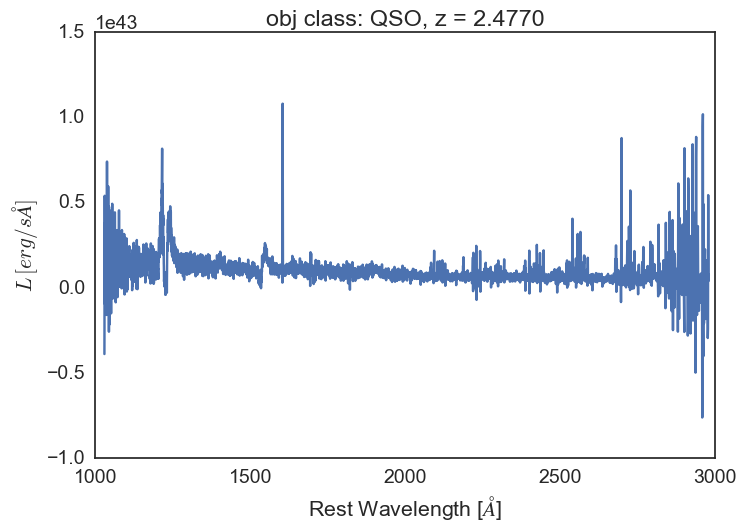

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_18_S28_1585_2587-spec-3786-55563-0840.txt
Object: Blind14A_18_S28_1585_2587
Blind14A_18_S28_1585_25
raMedian     162.094
decMedian   -1.39753
Name: Blind14A_18_S28_1585_2587, dtype: object


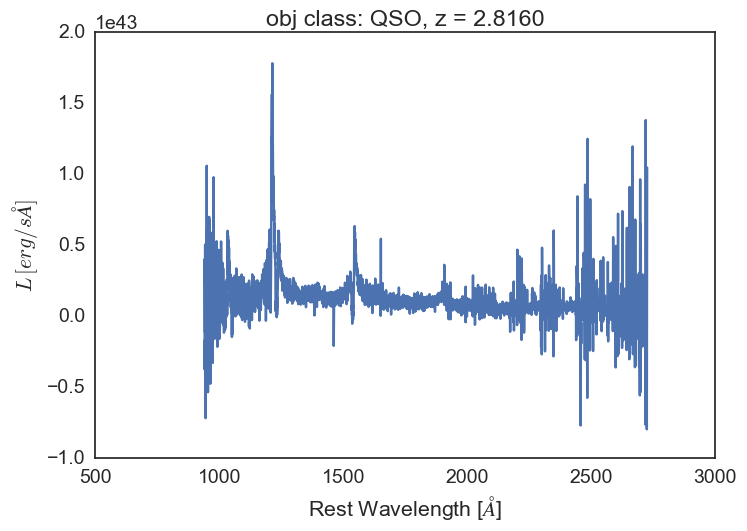

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_20_N29_1740_1711-spec-4733-55649-0362.txt
Object: Blind14A_20_N29_1740_1711
Blind14A_20_N29_1740_17
raMedian     161.252
decMedian    1.13978
Name: Blind14A_20_N29_1740_1711, dtype: object


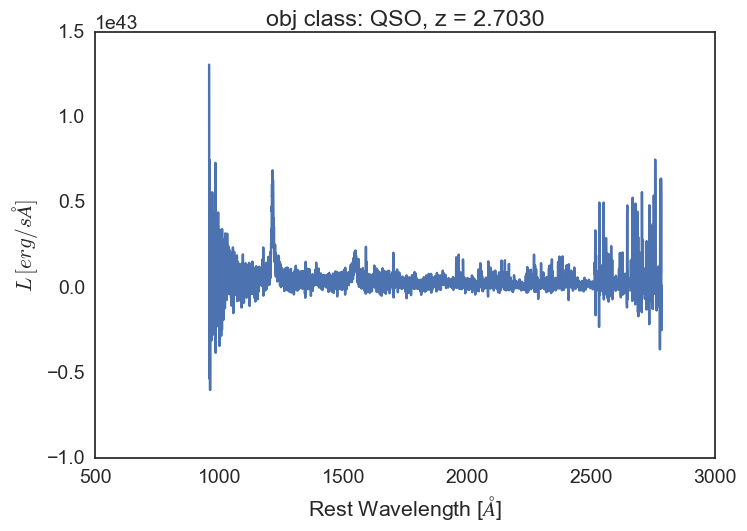

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_21_S17_1638_2723-spec-4732-55648-0740.txt
Object: Blind14A_21_S17_1638_2723
Blind14A_21_S17_1638_27
raMedian     164.216
decMedian    2.46219
Name: Blind14A_21_S17_1638_2723, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_21_S18_1982_2486-spec-4732-55648-0280.txt
Object: Blind14A_21_S18_1982_2486
Blind14A_21_S18_1982_24
raMedian     164.51
decMedian    2.4366
Name: Blind14A_21_S18_1982_2486, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_22_N25_1871_1767-spec-3835-55570-0378.txt
Object: Blind14A_22_N25_1871_1767
Blind14A_22_N25_1871_17
raMedian      162.312
decMedian   -0.801964
Name: Blind14A_22_N25_1871_1767, dtype: object


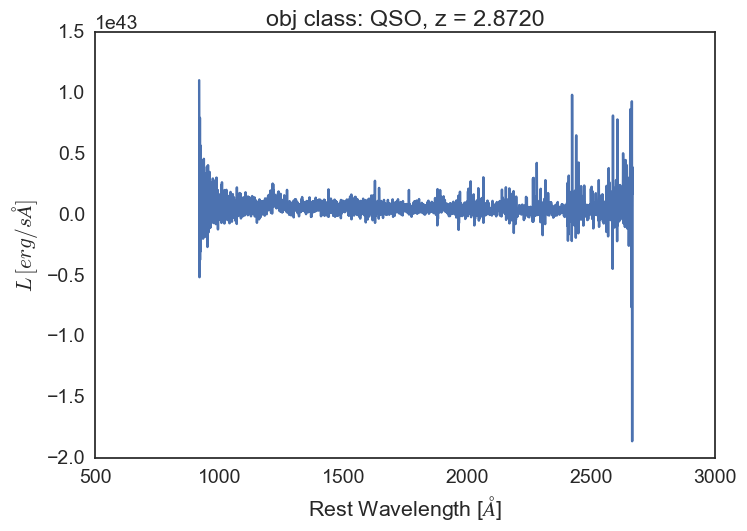

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_22_N3_0055_0912-spec-3834-56014-0002.txt
Object: Blind14A_22_N3_0055_0912
Blind14A_22_N3_0055_09
raMedian       162.404
decMedian   -0.0119829
Name: Blind14A_22_N3_0055_0912, dtype: object


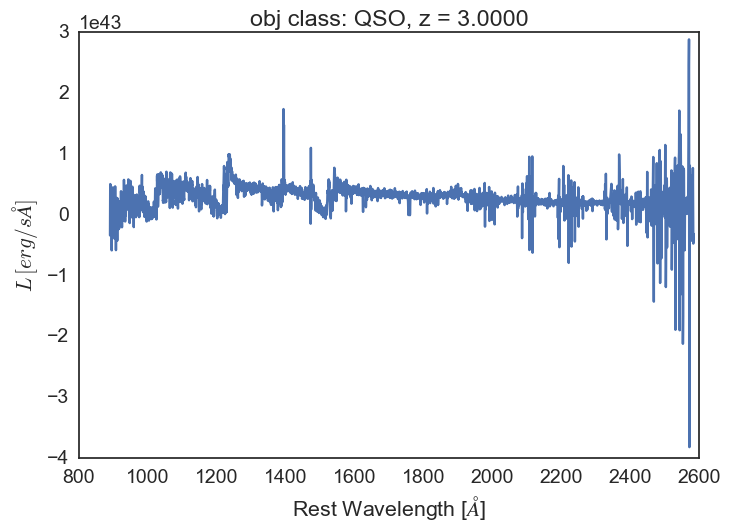

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_23_S20_0618_3872-spec-3772-55277-0808.txt
Object: Blind14A_23_S20_0618_3872
Blind14A_23_S20_0618_38
raMedian     163.522
decMedian   -1.49117
Name: Blind14A_23_S20_0618_3872, dtype: object


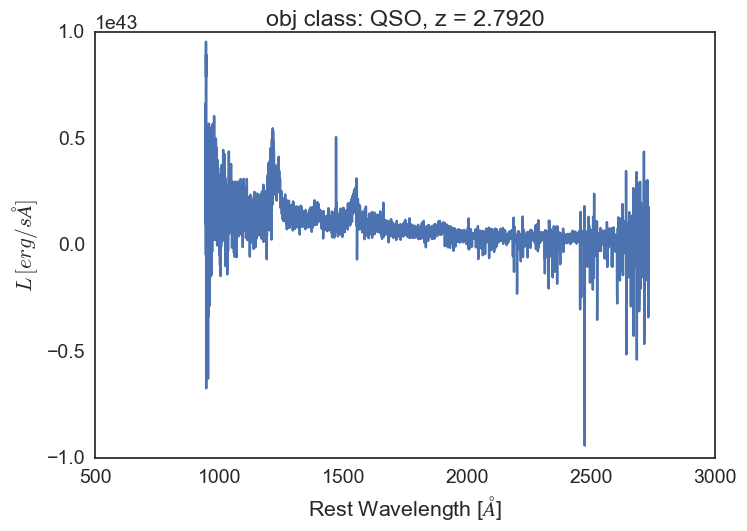

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_23_S24_0325_3795-spec-3772-55277-0998.txt
Object: Blind14A_23_S24_0325_3795
Blind14A_23_S24_0325_37
raMedian     164.759
decMedian   -1.47128
Name: Blind14A_23_S24_0325_3795, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_23_S24_1572_1796-spec-3772-55277-0984.txt
Object: Blind14A_23_S24_1572_1796
Blind14A_23_S24_1572_17
raMedian     164.613
decMedian   -1.56161
Name: Blind14A_23_S24_1572_1796, dtype: object


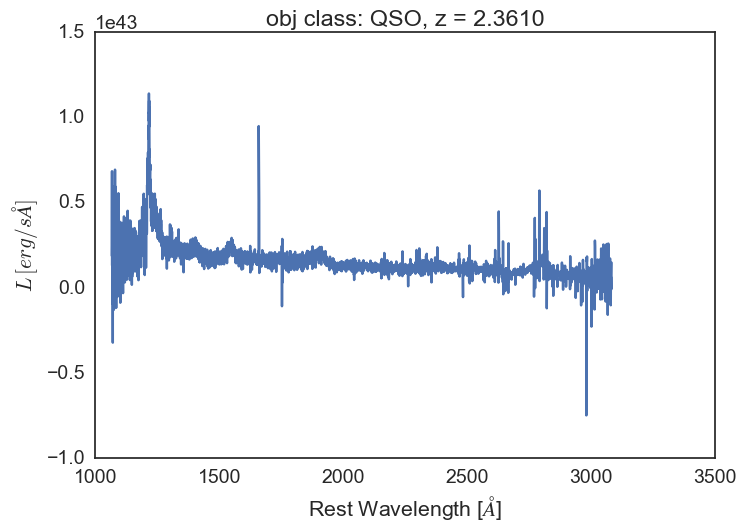

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_26_N18_1859_2086-spec-3773-55240-0214.txt
Object: Blind14A_26_N18_1859_2086
Blind14A_26_N18_1859_20
raMedian       166.9
decMedian   -2.57057
Name: Blind14A_26_N18_1859_2086, dtype: object


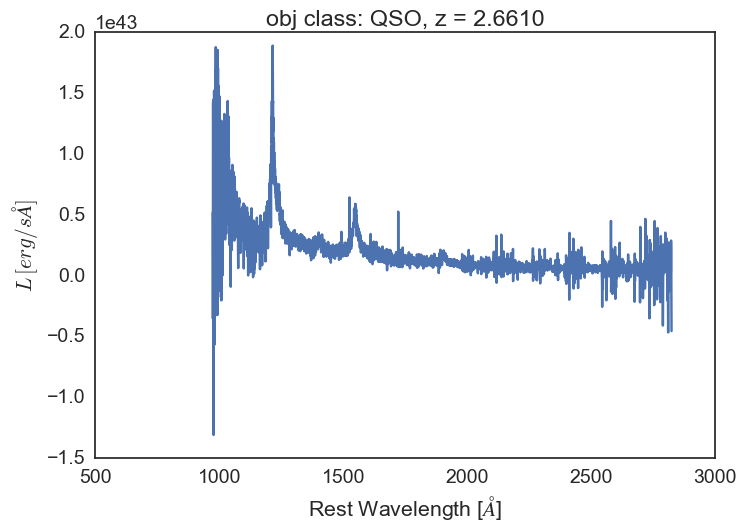

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_26_N20_1772_0951-spec-3787-55565-0094.txt
Object: Blind14A_26_N20_1772_0951
Blind14A_26_N20_1772_09
raMedian     165.728
decMedian   -2.72672
Name: Blind14A_26_N20_1772_0951, dtype: object


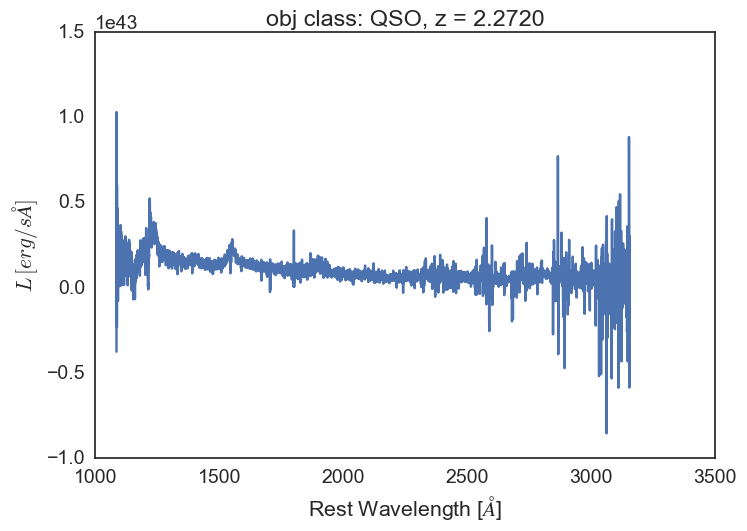

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_26_S23_1839_2019-spec-3773-55240-0770.txt
Object: Blind14A_26_S23_1839_2019
Blind14A_26_S23_1839_20
raMedian      166.74
decMedian   -1.58142
Name: Blind14A_26_S23_1839_2019, dtype: object


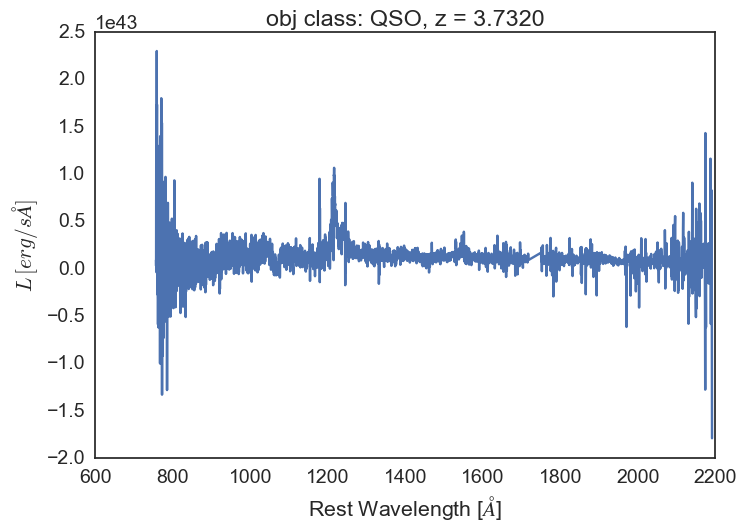

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_27_N20_0421_3483-spec-3836-55302-0344.txt
Object: Blind14A_27_N20_0421_3483
Blind14A_27_N20_0421_34
raMedian      164.702
decMedian   -0.531503
Name: Blind14A_27_N20_0421_3483, dtype: object


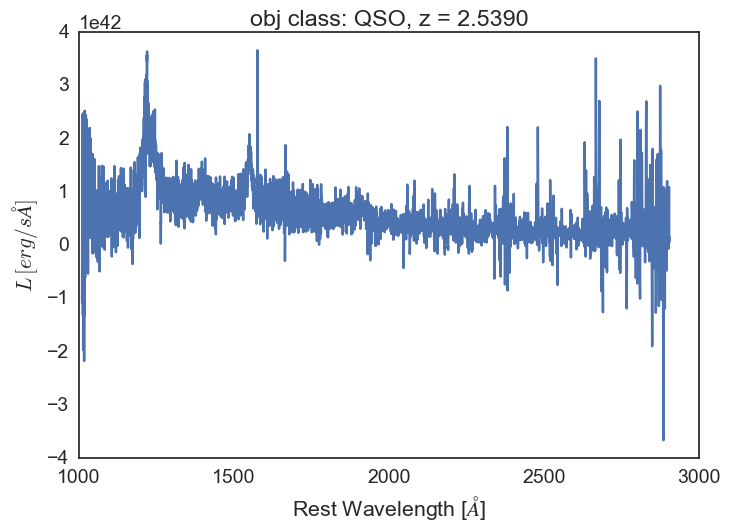

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_27_N24_1032_2884-spec-3787-55565-0942.txt
Object: Blind14A_27_N24_1032_2884
Blind14A_27_N24_1032_28
raMedian        165.9
decMedian   -0.576685
Name: Blind14A_27_N24_1032_2884, dtype: object


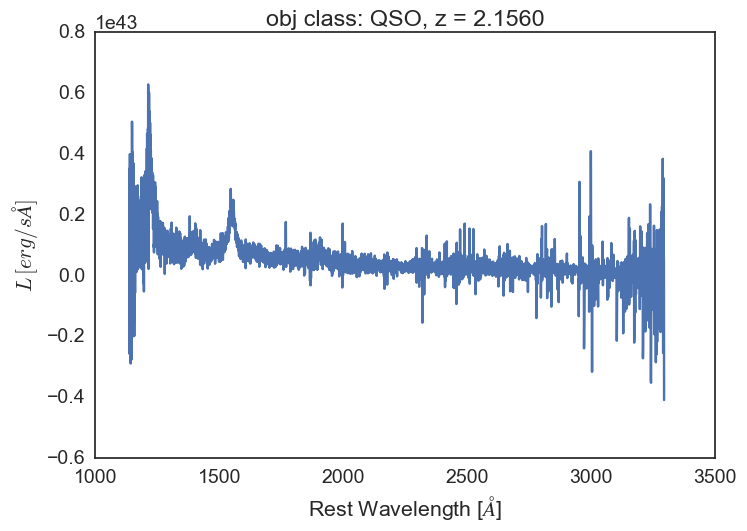

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_27_S16_0474_1255-spec-3836-55302-0724.txt
Object: Blind14A_27_S16_0474_1255
Blind14A_27_S16_0474_12
raMedian      165.006
decMedian    0.452151
Name: Blind14A_27_S16_0474_1255, dtype: object


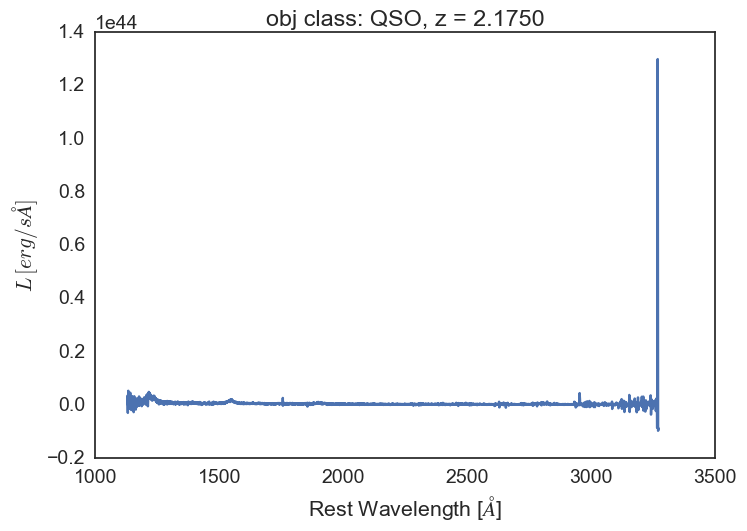

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_27_S19_0974_2199-spec-3836-55302-0928.txt
Object: Blind14A_27_S19_0974_2199
Blind14A_27_S19_0974_21
raMedian      166.007
decMedian    0.413853
Name: Blind14A_27_S19_0974_2199, dtype: object


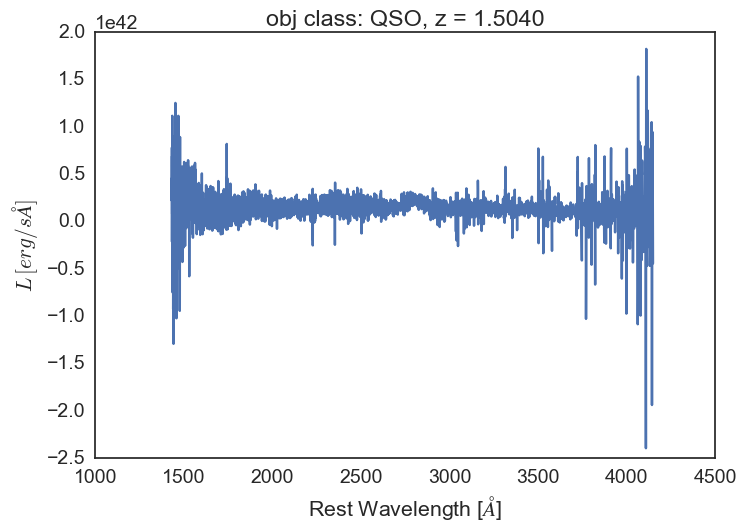

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_28_S17_0686_2287-spec-4741-55704-0646.txt
Object: Blind14A_28_S17_0686_2287
Blind14A_28_S17_0686_22
raMedian     166.605
decMedian     2.5326
Name: Blind14A_28_S17_0686_2287, dtype: object


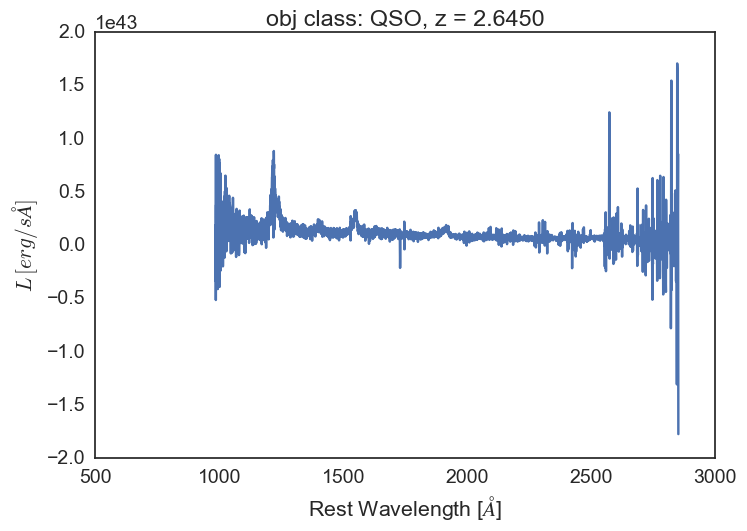

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_29_N25_1281_3258-spec-4731-55656-0382.txt
Object: Blind14A_29_N25_1281_3258
Blind14A_29_N25_1281_32
raMedian     168.476
decMedian    1.33753
Name: Blind14A_29_N25_1281_3258, dtype: object


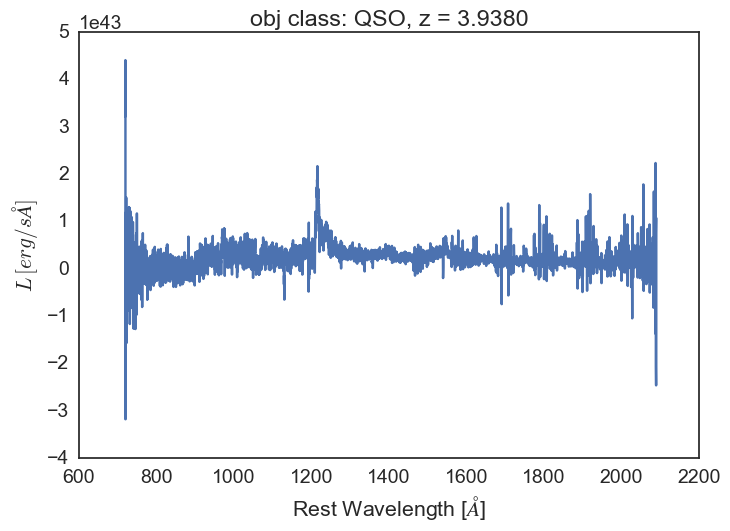

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_29_N6_0607_3671-spec-4731-55656-0206.txt
Object: Blind14A_29_N6_0607_3671
Blind14A_29_N6_0607_36
raMedian     169.595
decMedian    2.04337
Name: Blind14A_29_N6_0607_3671, dtype: object


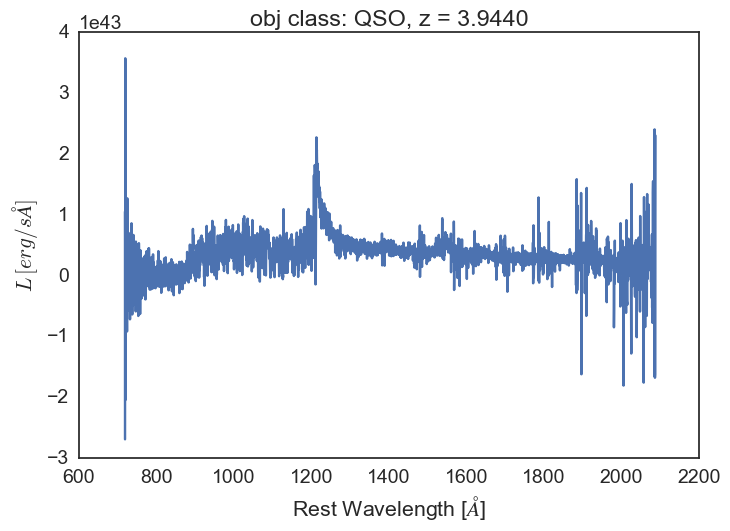

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_30_N12_1390_2846-spec-3838-55588-0492.txt
Object: Blind14A_30_N12_1390_2846
Blind14A_30_N12_1390_28
raMedian      168.164
decMedian   -0.274268
Name: Blind14A_30_N12_1390_2846, dtype: object


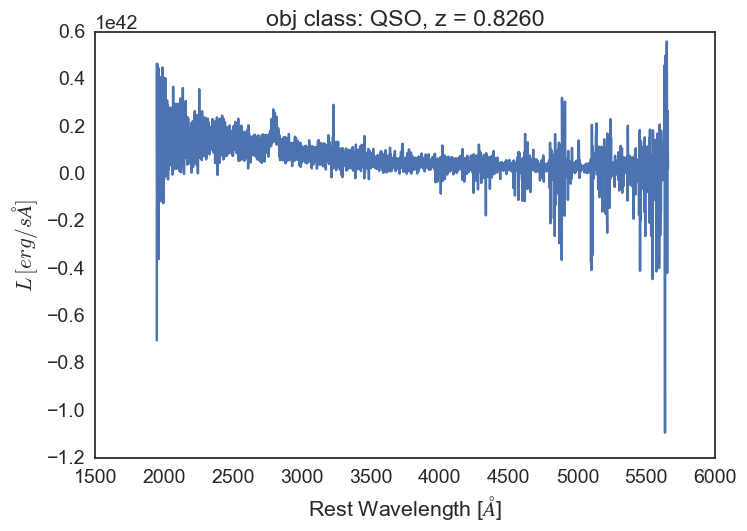

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_30_N21_1018_3331-spec-3773-55240-0906.txt
Object: Blind14A_30_N21_1018_3331
Blind14A_30_N21_1018_33
raMedian      167.422
decMedian   -0.575406
Name: Blind14A_30_N21_1018_3331, dtype: object


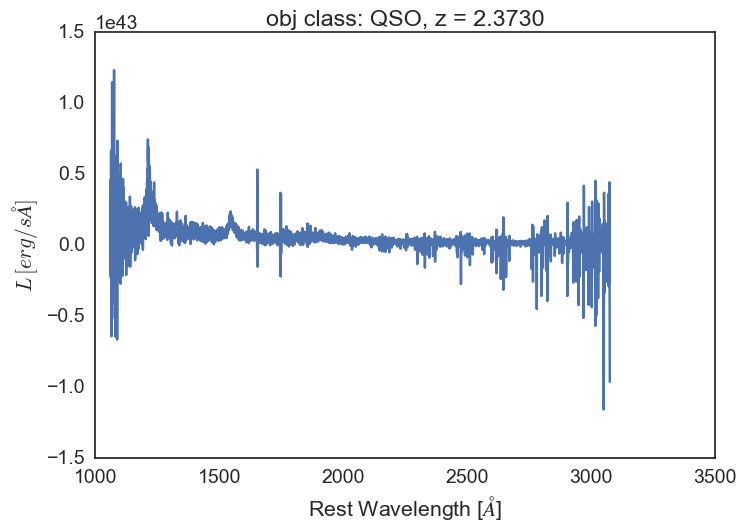

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_30_N31_1312_0798-spec-3837-55572-0126.txt
Object: Blind14A_30_N31_1312_0798
Blind14A_30_N31_1312_07
raMedian      167.858
decMedian   -0.925332
Name: Blind14A_30_N31_1312_0798, dtype: object


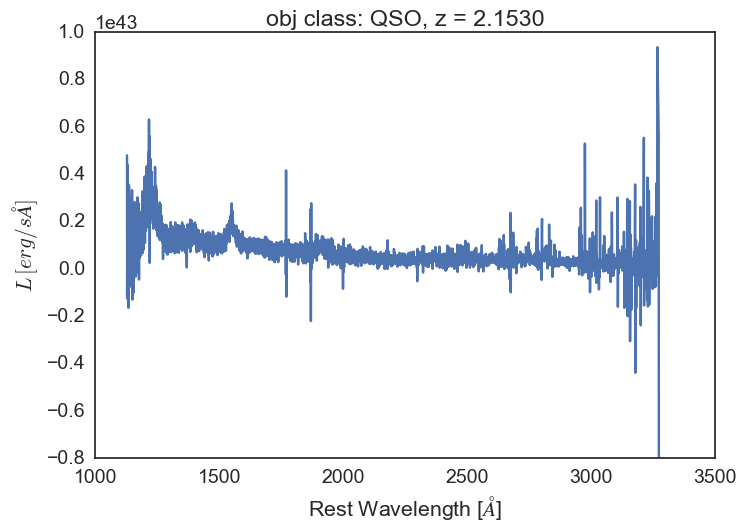

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_30_N9_0628_2532-spec-3837-55572-0280.txt
Object: Blind14A_30_N9_0628_2532
Blind14A_30_N9_0628_25
raMedian      167.208
decMedian   -0.217726
Name: Blind14A_30_N9_0628_2532, dtype: object


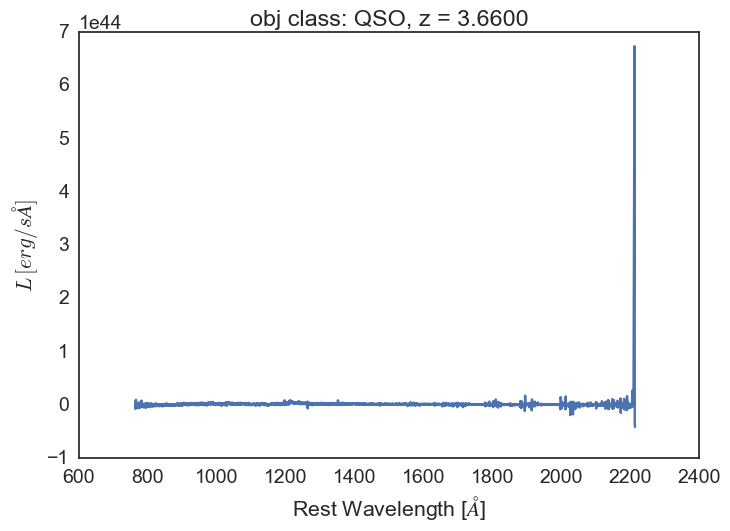

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_30_S17_0517_1132-spec-3837-55572-0888.txt
Object: Blind14A_30_S17_0517_1132
Blind14A_30_S17_0517_11
raMedian      167.728
decMedian    0.448614
Name: Blind14A_30_S17_0517_1132, dtype: object


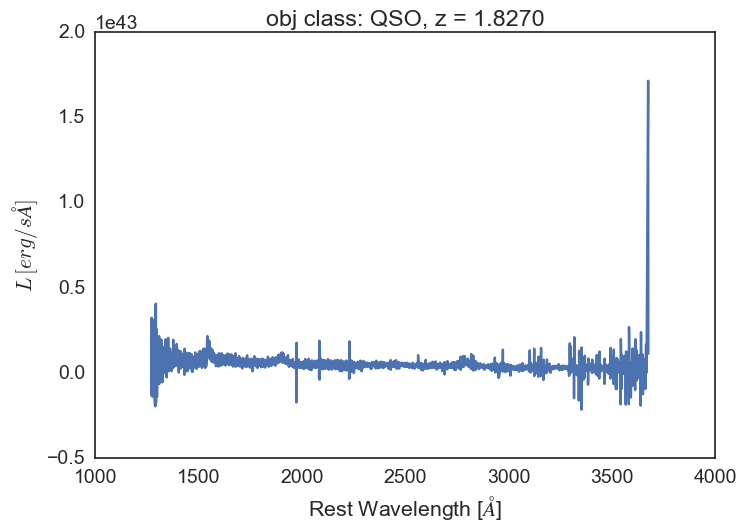

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_31_S5_1947_2695-spec-3774-55244-0496.txt
Object: Blind14A_31_S5_1947_2695
Blind14A_31_S5_1947_26
raMedian     169.212
decMedian   -2.08188
Name: Blind14A_31_S5_1947_2695, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_34_N10_0450_2738-spec-3774-55244-0146.txt
Object: Blind14A_34_N10_0450_2738
Blind14A_34_N10_0450_27
raMedian      171.17
decMedian   -2.30186
Name: Blind14A_34_N10_0450_2738, dtype: object


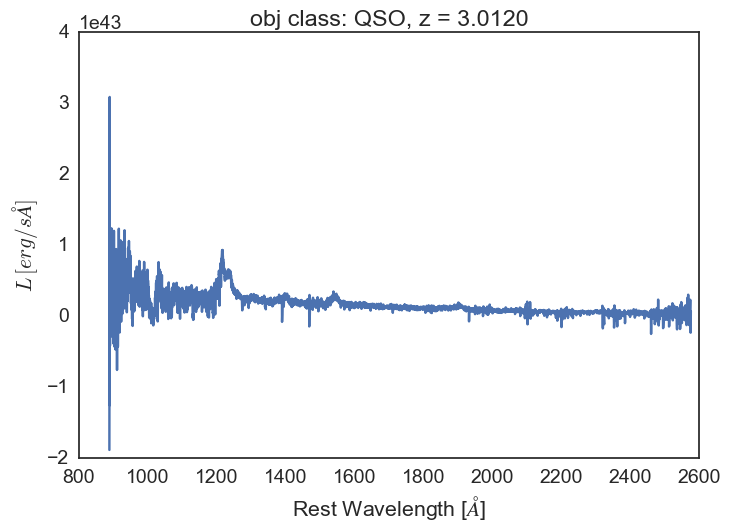

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_34_N27_0726_1948-spec-0326-52375-0240.txt
Object: Blind14A_34_N27_0726_1948
Blind14A_34_N27_0726_19
raMedian     171.423
decMedian   -2.81551
Name: Blind14A_34_N27_0726_1948, dtype: object


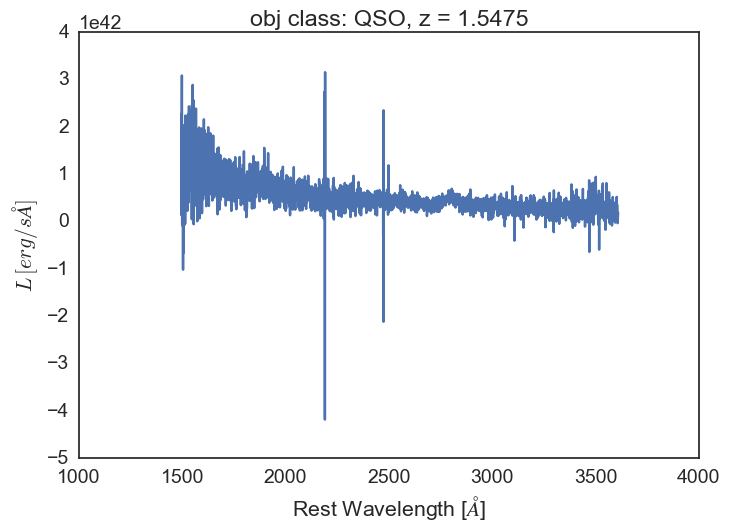

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_34_S22_1278_1975-spec-3774-55244-0930.txt
Object: Blind14A_34_S22_1278_1975
Blind14A_34_S22_1278_19
raMedian     171.271
decMedian   -1.53914
Name: Blind14A_34_S22_1278_1975, dtype: object


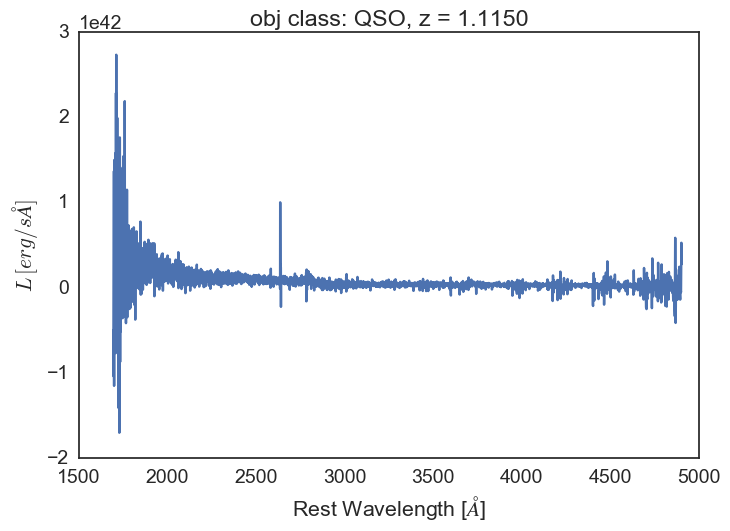

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_35_S22_1046_3630-spec-3838-55588-0924.txt
Object: Blind14A_35_S22_1046_3630
Blind14A_35_S22_1046_36
raMedian      170.176
decMedian    0.573513
Name: Blind14A_35_S22_1046_3630, dtype: object


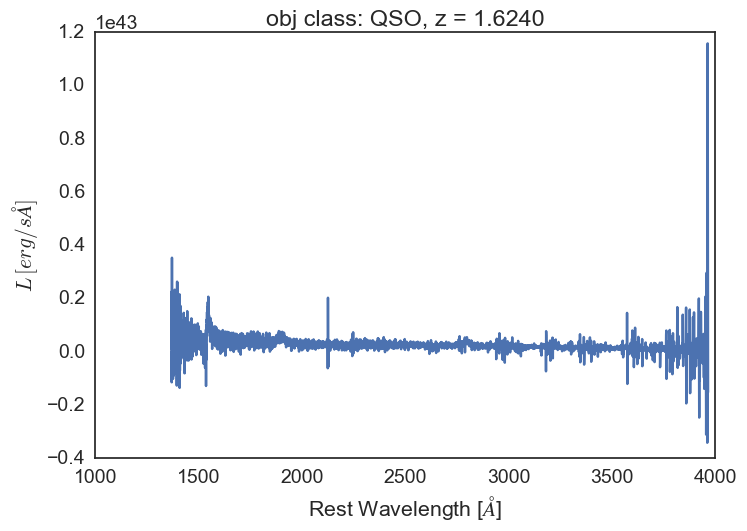

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_35_S2_1995_3577-spec-0279-51984-0553.txt
Object: Blind14A_35_S2_1995_3577
Blind14A_35_S2_1995_35
raMedian       169.549
decMedian    0.0107959
Name: Blind14A_35_S2_1995_3577, dtype: object


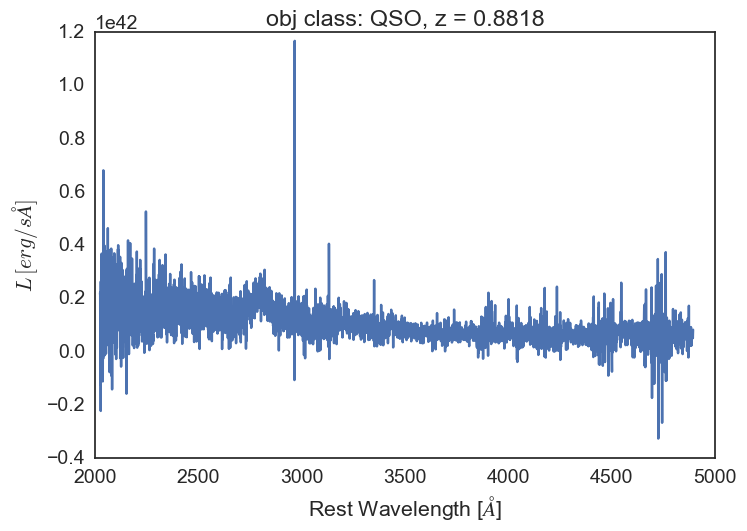

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_35_S31_1656_2710-spec-3839-55575-0558.txt
Object: Blind14A_35_S31_1656_2710
Blind14A_35_S31_1656_27
raMedian      170.419
decMedian    0.856685
Name: Blind14A_35_S31_1656_2710, dtype: object


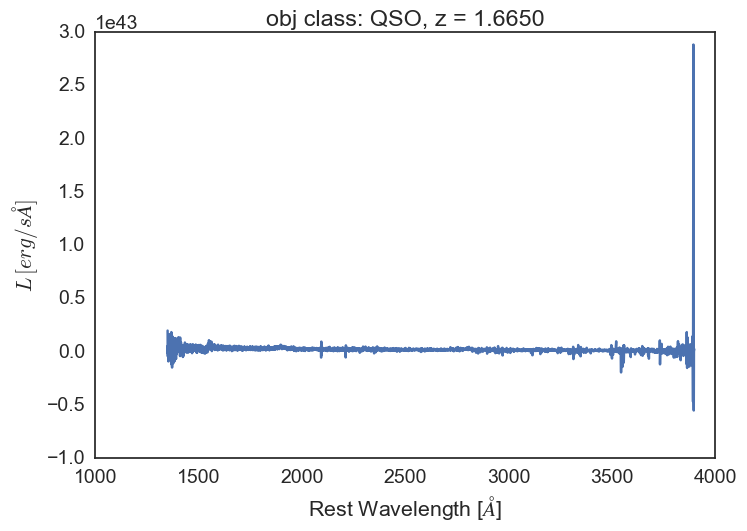

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_36_N27_0851_2856-spec-3839-55575-0824.txt
Object: Blind14A_36_N27_0851_2856
Blind14A_36_N27_0851_28
raMedian     171.489
decMedian    1.36742
Name: Blind14A_36_N27_0851_2856, dtype: object


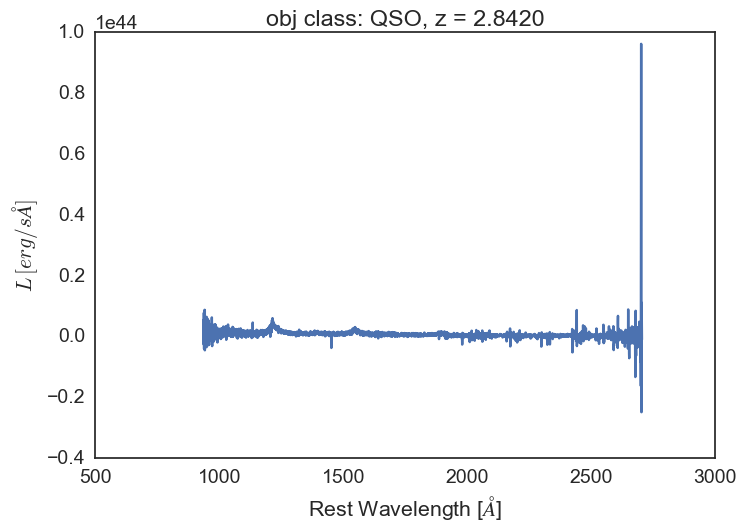

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_36_S4_1525_2791-spec-4730-55630-0394.txt
Object: Blind14A_36_S4_1525_2791
Blind14A_36_S4_1525_27
raMedian      171.33
decMedian    2.14098
Name: Blind14A_36_S4_1525_2791, dtype: object


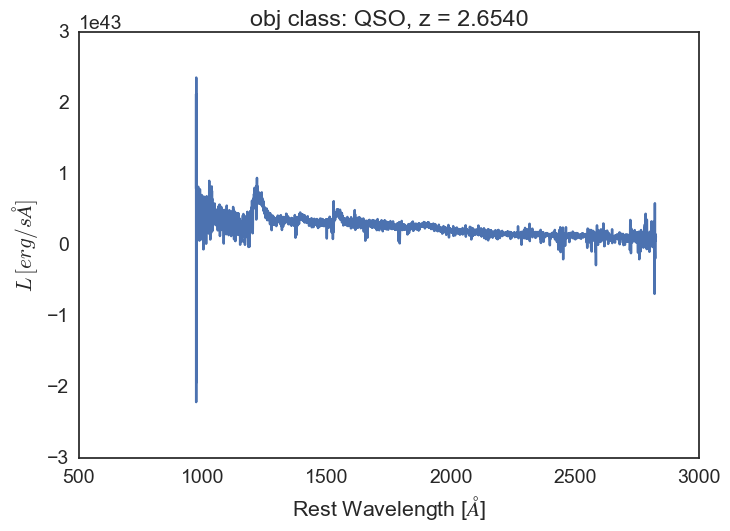

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_37_N4_0464_1348-spec-4740-55651-0348.txt
Object: Blind14A_37_N4_0464_1348
Blind14A_37_N4_0464_13
raMedian     173.646
decMedian     2.0547
Name: Blind14A_37_N4_0464_1348, dtype: object


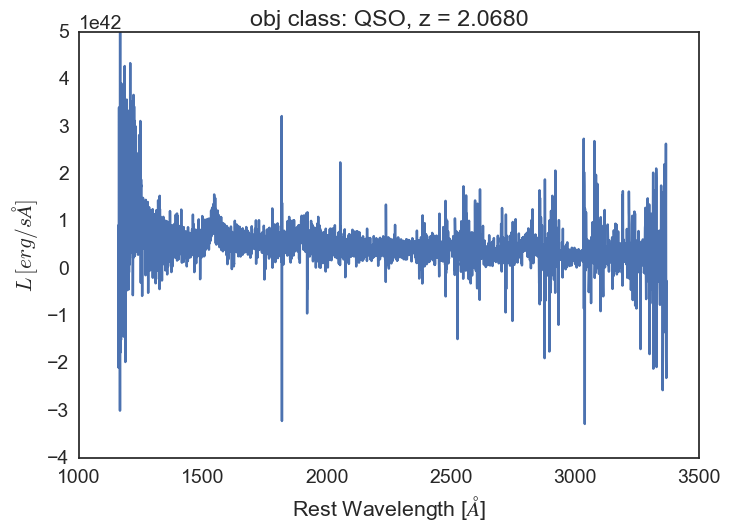

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_38_N4_1157_3583-spec-3840-55574-0440.txt
Object: Blind14A_38_N4_1157_3583
Blind14A_38_N4_1157_35
raMedian       172.592
decMedian   -0.0936462
Name: Blind14A_38_N4_1157_3583, dtype: object


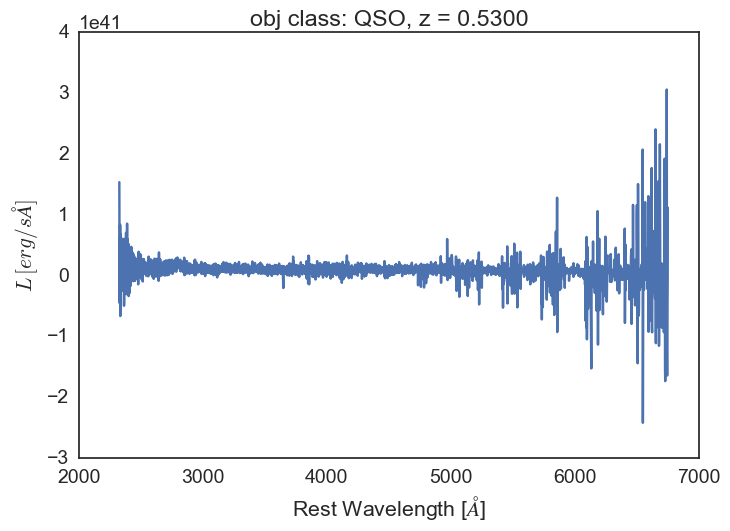

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_38_N4_1843_0326-spec-3840-55574-0438.txt
Object: Blind14A_38_N4_1843_0326
Blind14A_38_N4_1843_03
raMedian      172.353
decMedian   -0.143719
Name: Blind14A_38_N4_1843_0326, dtype: object


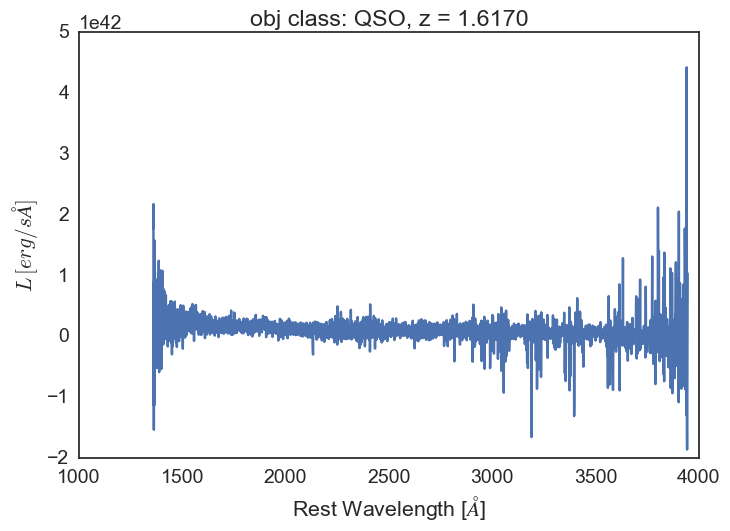

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_38_S13_0593_2442-spec-3840-55574-0778.txt
Object: Blind14A_38_S13_0593_2442
Blind14A_38_S13_0593_24
raMedian      173.285
decMedian    0.275927
Name: Blind14A_38_S13_0593_2442, dtype: object


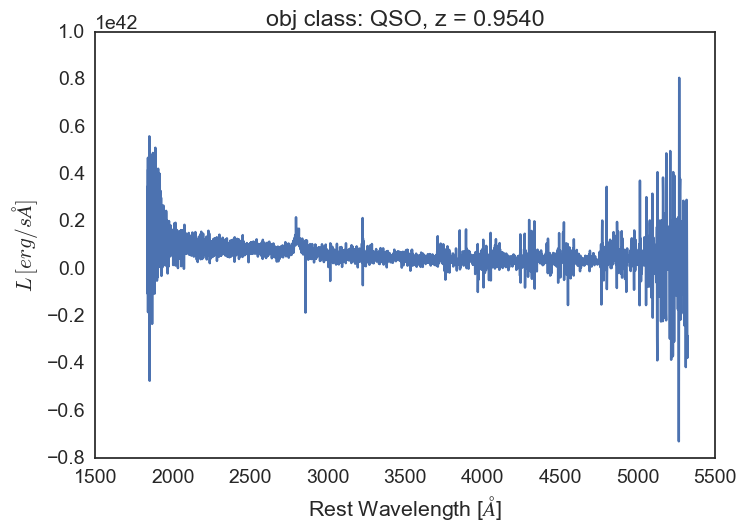

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_N10_1479_0833-spec-3789-55269-0022.txt
Object: Blind14A_39_N10_1479_0833
Blind14A_39_N10_1479_08
raMedian      173.45
decMedian   -2.37608
Name: Blind14A_39_N10_1479_0833, dtype: object


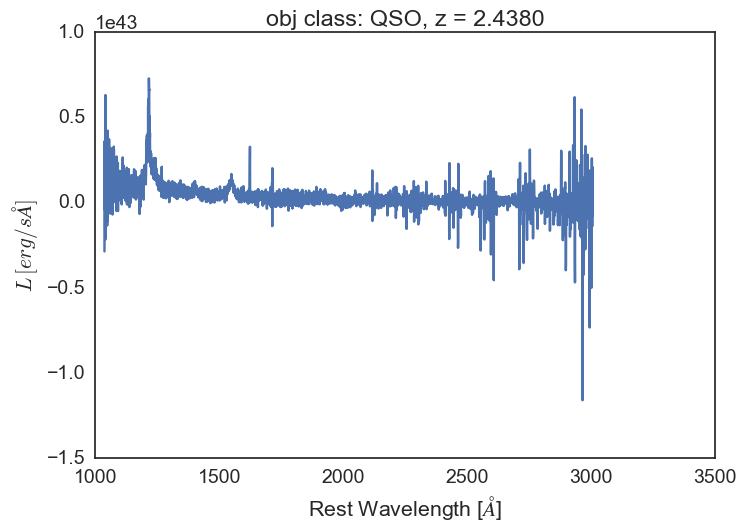

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_N11_1154_0789-spec-3775-55207-0486.txt
Object: Blind14A_39_N11_1154_0789
Blind14A_39_N11_1154_07
raMedian     173.759
decMedian   -2.35284
Name: Blind14A_39_N11_1154_0789, dtype: object


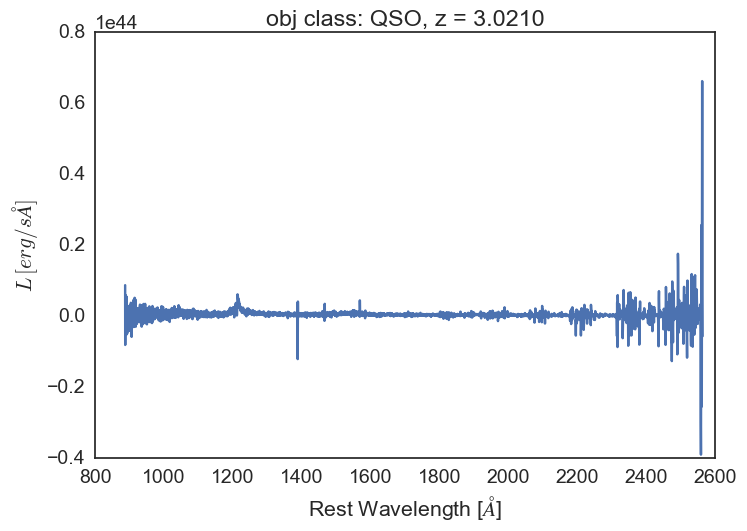

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_N12_0527_2295-spec-3775-55207-0429.txt
Object: Blind14A_39_N12_0527_2295
Blind14A_39_N12_0527_22
raMedian      174.18
decMedian   -2.30722
Name: Blind14A_39_N12_0527_2295, dtype: object


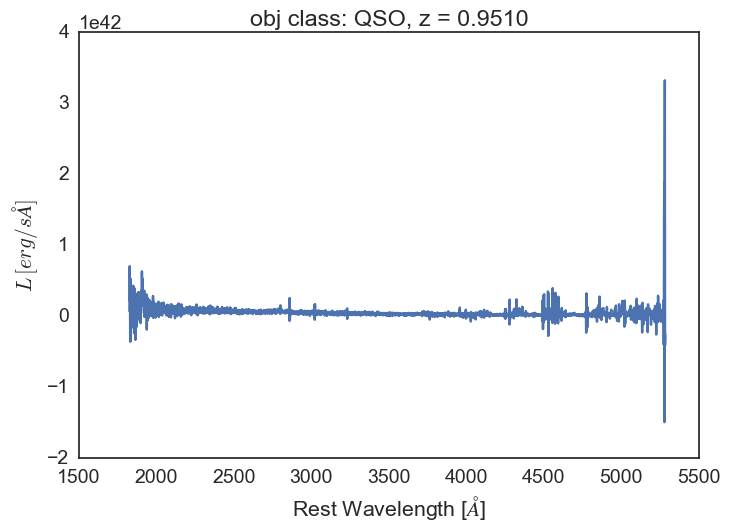

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_N25_1021_1050-spec-3789-55269-0130.txt
Object: Blind14A_39_N25_1021_1050
Blind14A_39_N25_1021_10
raMedian     173.155
decMedian   -2.83486
Name: Blind14A_39_N25_1021_1050, dtype: object


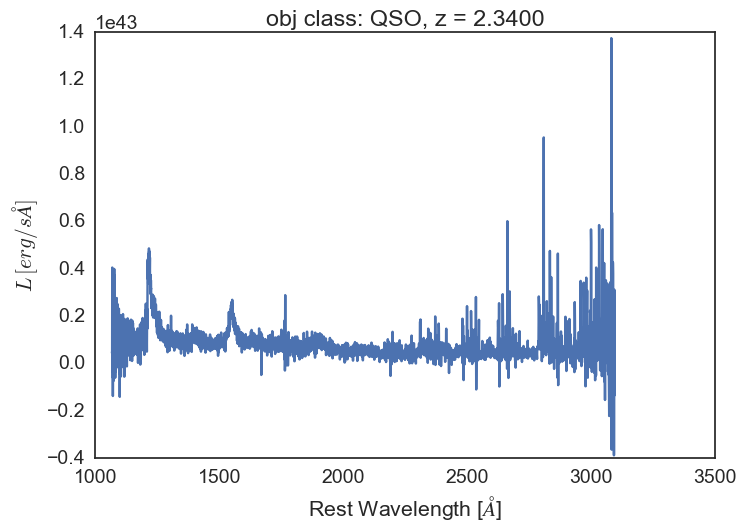

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_N9_1937_4060-spec-3789-55269-0064.txt
Object: Blind14A_39_N9_1937_4060
Blind14A_39_N9_1937_40
raMedian     173.375
decMedian   -2.40982
Name: Blind14A_39_N9_1937_4060, dtype: object


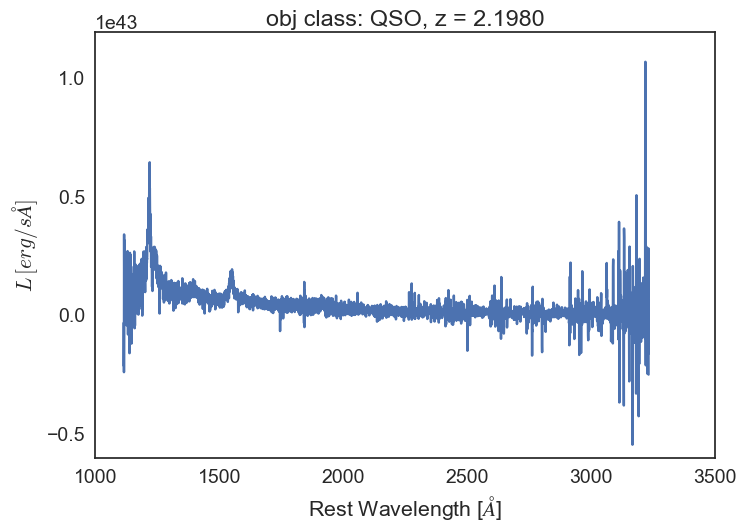

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind14A_39_S12_1217_2019-spec-3775-55207-0580.txt
Object: Blind14A_39_S12_1217_2019
Blind14A_39_S12_1217_20
raMedian     174.161
decMedian   -1.86357
Name: Blind14A_39_S12_1217_2019, dtype: object


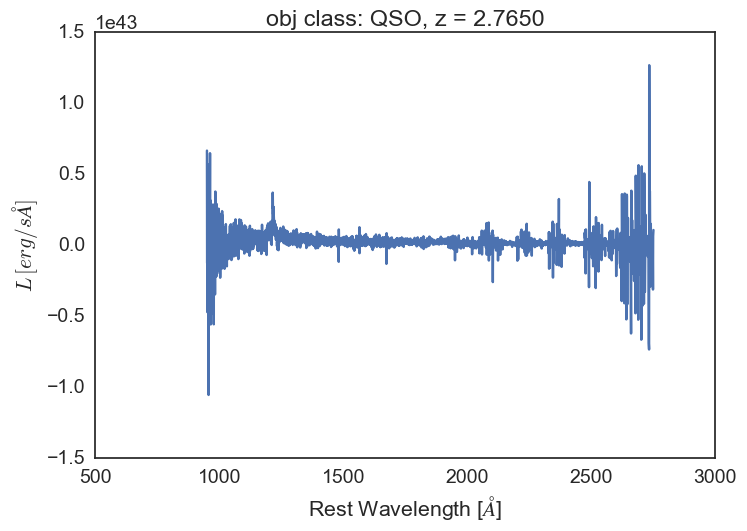

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_04_N20_1590_3512-spec-3780-55240-0635.txt
Object: Blind15A_04_N20_1590_3512
Blind15A_04_N20_1590_35
raMedian      136.708
decMedian   -0.913363
Name: Blind15A_04_N20_1590_3512, dtype: object


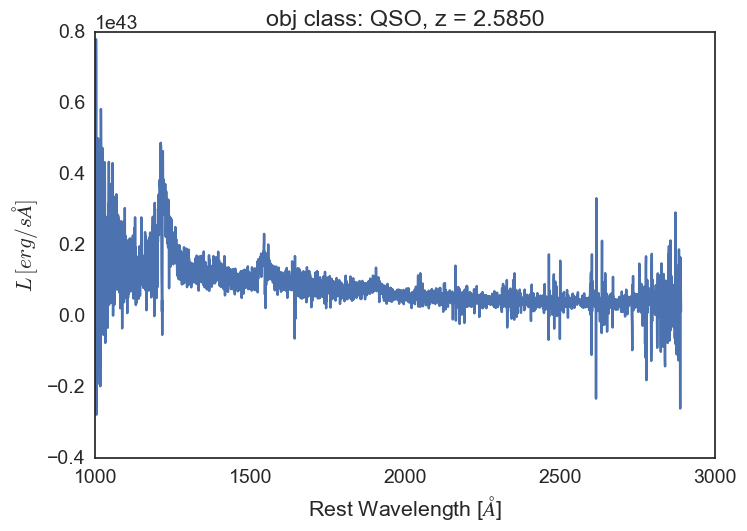

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_04_S21_1037_3357-spec-0470-51929-0600.txt
Object: Blind15A_04_S21_1037_3357
Blind15A_04_S21_1037_33
raMedian      137.008
decMedian    0.278699
Name: Blind15A_04_S21_1037_3357, dtype: object


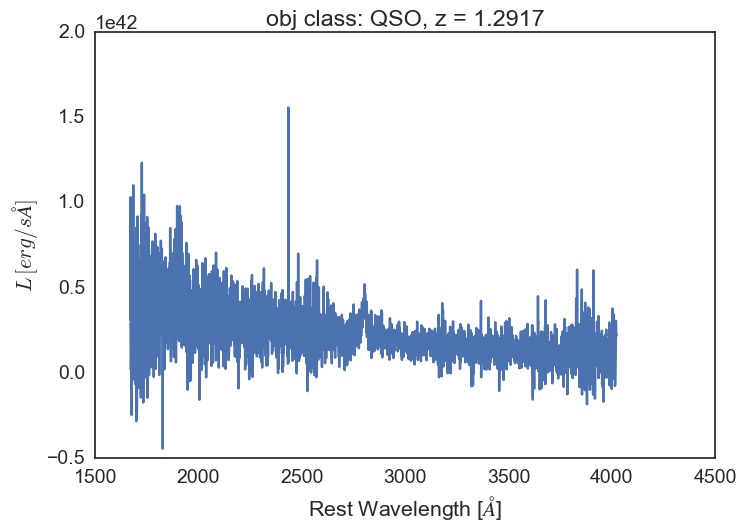

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_04_S25_1754_3760-spec-3818-55532-0850.txt
Object: Blind15A_04_S25_1754_3760
Blind15A_04_S25_1754_37
raMedian      136.883
decMedian    0.390482
Name: Blind15A_04_S25_1754_3760, dtype: object


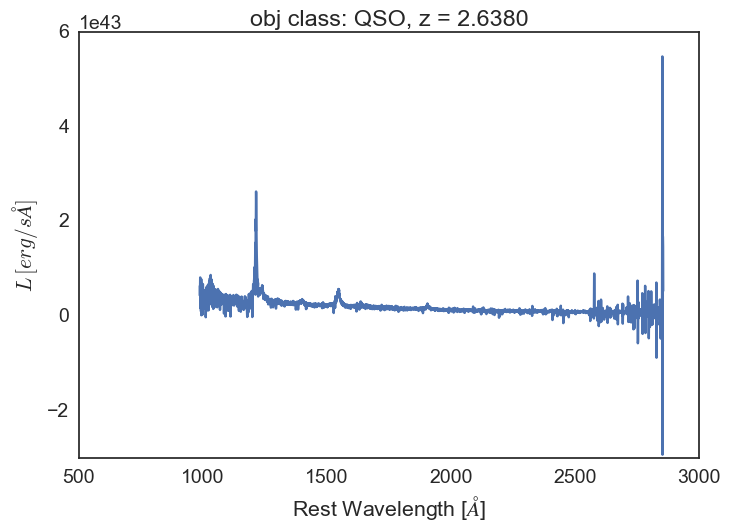

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_N16_0405_1473-spec-0472-51955-0375.txt
Object: Blind15A_05_N16_0405_1473
Blind15A_05_N16_0405_14
raMedian      138.18
decMedian    1.33725
Name: Blind15A_05_N16_0405_1473, dtype: object


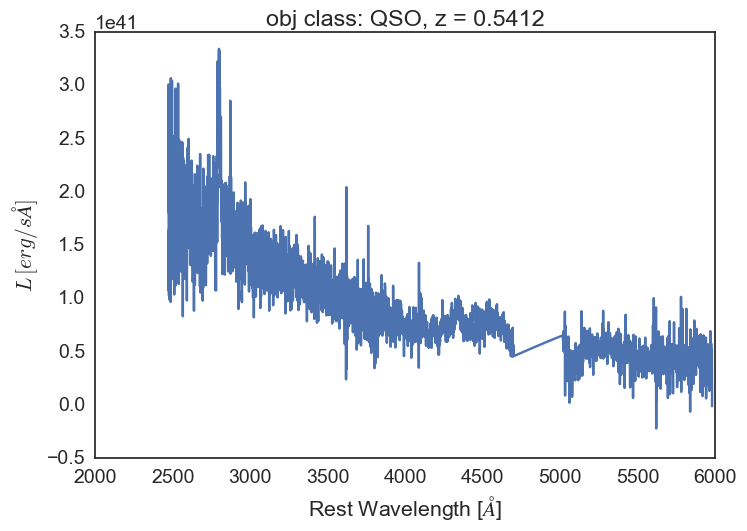

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_N16_0458_1740-spec-0472-51955-0417.txt
Object: Blind15A_05_N16_0458_1740
Blind15A_05_N16_0458_17
raMedian     138.199
decMedian    1.33329
Name: Blind15A_05_N16_0458_1740, dtype: object


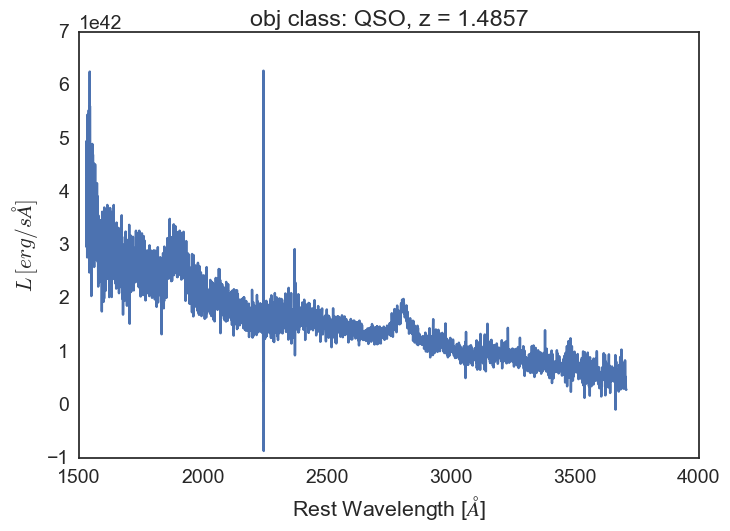

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_N5_0490_2735-spec-3822-55544-0356.txt
Object: Blind15A_05_N5_0490_2735
Blind15A_05_N5_0490_27
raMedian     138.739
decMedian    1.65992
Name: Blind15A_05_N5_0490_2735, dtype: object


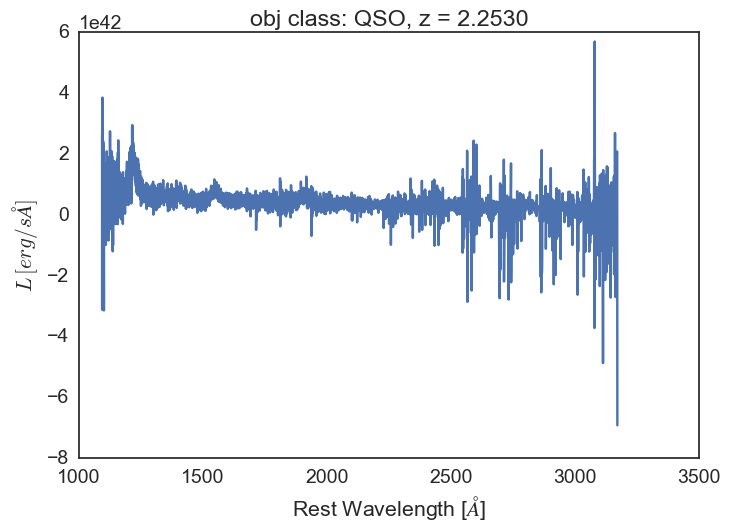

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_N6_0849_3721-spec-0473-51929-0223.txt
Object: Blind15A_05_N6_0849_3721
Blind15A_05_N6_0849_37
raMedian     139.122
decMedian    1.63344
Name: Blind15A_05_N6_0849_3721, dtype: object


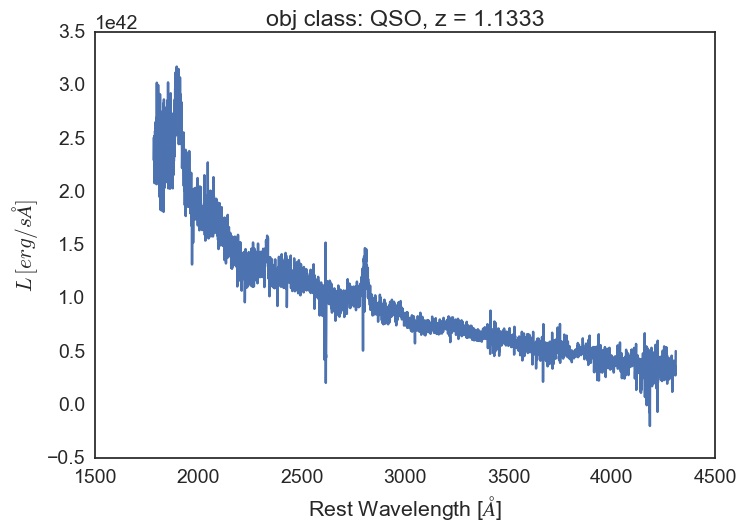

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_S19_0322_2810-spec-3822-55544-0798.txt
Object: Blind15A_05_S19_0322_2810
Blind15A_05_S19_0322_28
raMedian     139.211
decMedian    2.16506
Name: Blind15A_05_S19_0322_2810, dtype: object


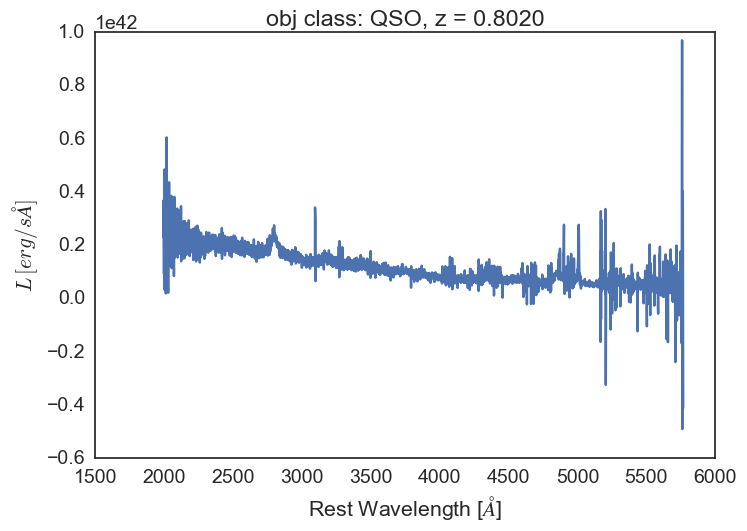

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_S31_1312_2856-spec-0473-51929-0324.txt
Object: Blind15A_05_S31_1312_2856
Blind15A_05_S31_1312_28
raMedian     138.748
decMedian    2.58639
Name: Blind15A_05_S31_1312_2856, dtype: object


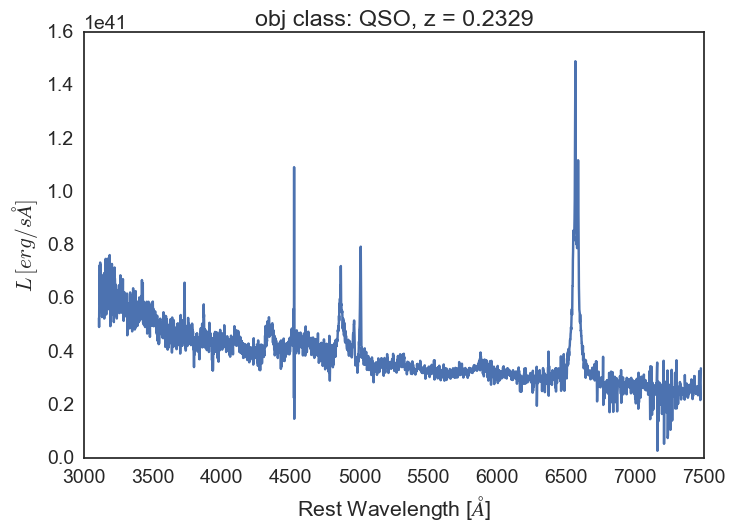

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_05_S4_1526_0200-spec-3819-55540-0014.txt
Object: Blind15A_05_S4_1526_0200
Blind15A_05_S4_1526_02
raMedian     138.243
decMedian    1.74941
Name: Blind15A_05_S4_1526_0200, dtype: object


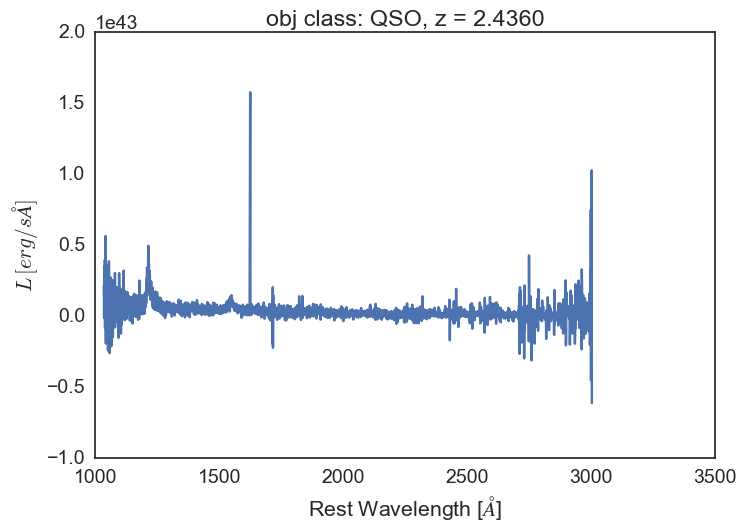

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N11_1227_3393-spec-3823-55534-0680.txt
Object: Blind15A_06_N11_1227_3393
Blind15A_06_N11_1227_33
raMedian     140.942
decMedian     1.4412
Name: Blind15A_06_N11_1227_3393, dtype: object


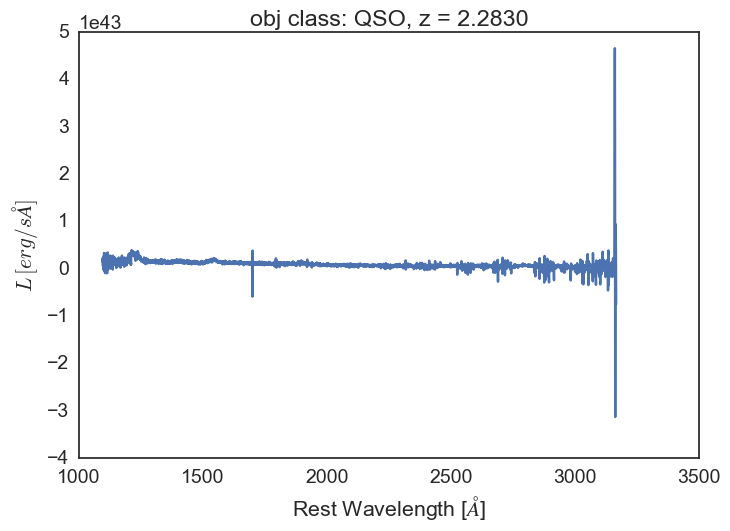

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N15_1486_1108-spec-3822-55544-0022.txt
Object: Blind15A_06_N15_1486_1108
Blind15A_06_N15_1486_11
raMedian     140.152
decMedian    1.25881
Name: Blind15A_06_N15_1486_1108, dtype: object


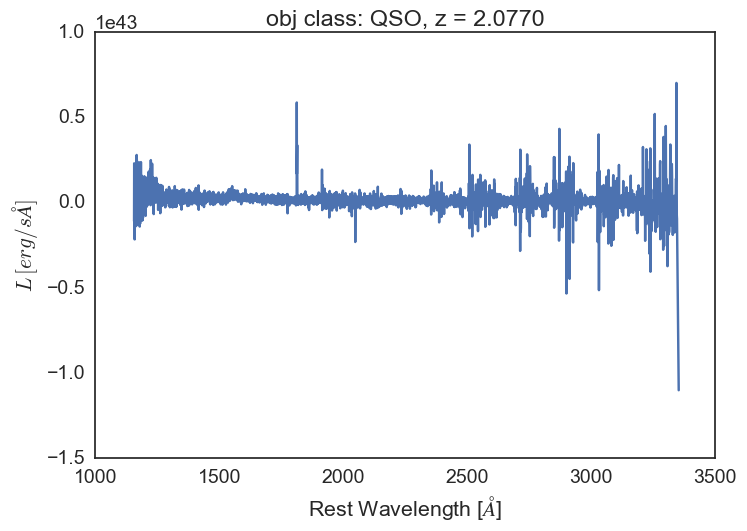

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N17_1848_1753-spec-0473-51929-0005.txt
Object: Blind15A_06_N17_1848_1753
Blind15A_06_N17_1848_17
raMedian     140.821
decMedian     1.2314
Name: Blind15A_06_N17_1848_1753, dtype: object


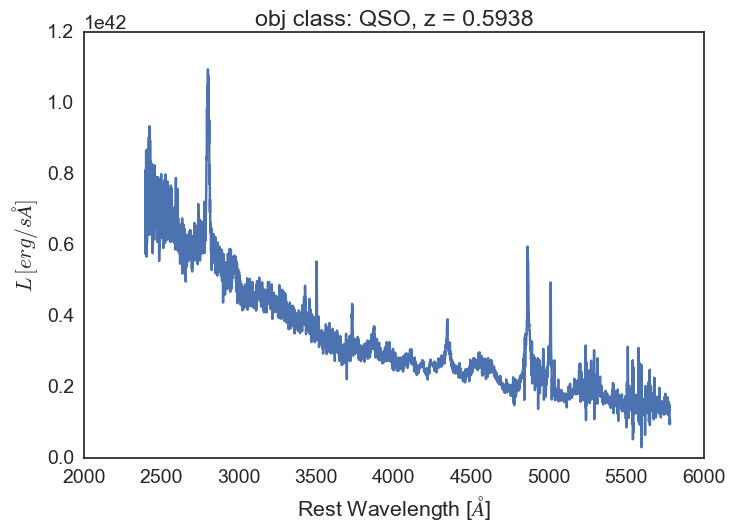

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N21_1770_2753-spec-0473-51929-0051.txt
Object: Blind15A_06_N21_1770_2753
Blind15A_06_N21_1770_27
raMedian     140.428
decMedian     1.0731
Name: Blind15A_06_N21_1770_2753, dtype: object


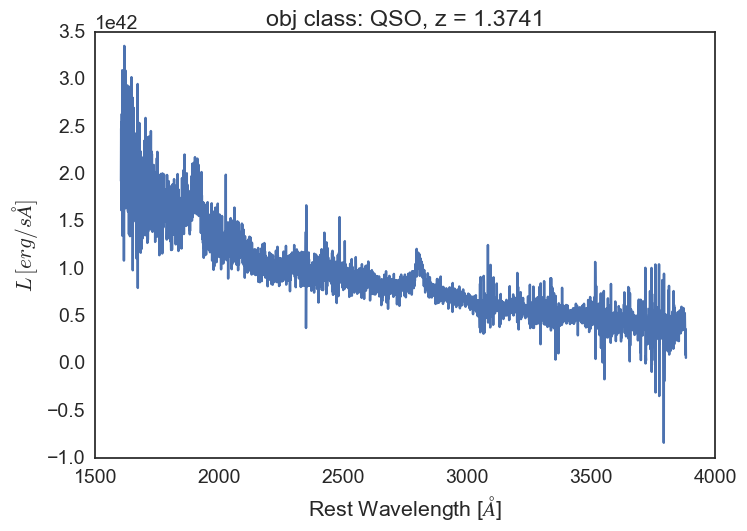

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N4_1944_2954-spec-4735-55651-0294.txt
Object: Blind15A_06_N4_1944_2954
Blind15A_06_N4_1944_29
raMedian     140.754
decMedian    1.55348
Name: Blind15A_06_N4_1944_2954, dtype: object


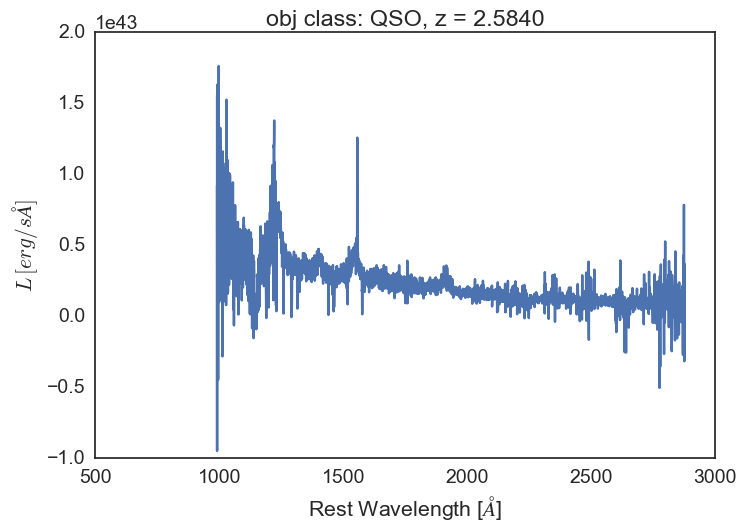

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_N9_1878_1445-spec-3822-55544-0028.txt
Object: Blind15A_06_N9_1878_1445
Blind15A_06_N9_1878_14
raMedian     140.177
decMedian    1.39446
Name: Blind15A_06_N9_1878_1445, dtype: object


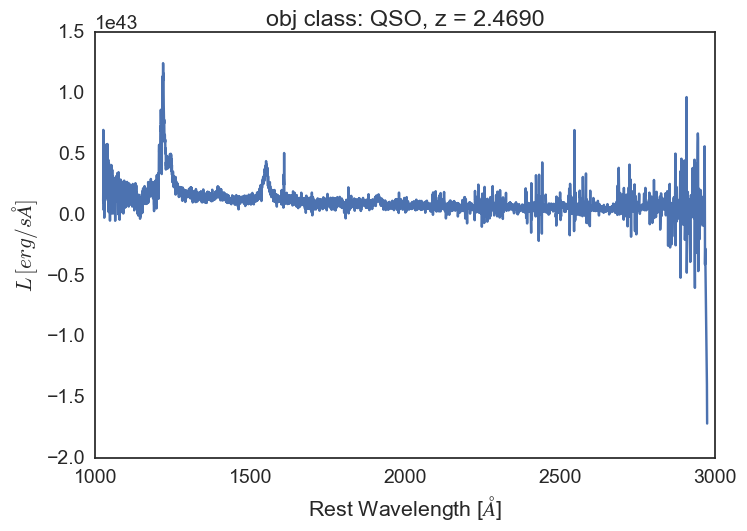

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_S24_0409_0985-spec-0475-51965-0331.txt
Object: Blind15A_06_S24_0409_0985
Blind15A_06_S24_0409_09
raMedian     141.233
decMedian    2.32387
Name: Blind15A_06_S24_0409_0985, dtype: object


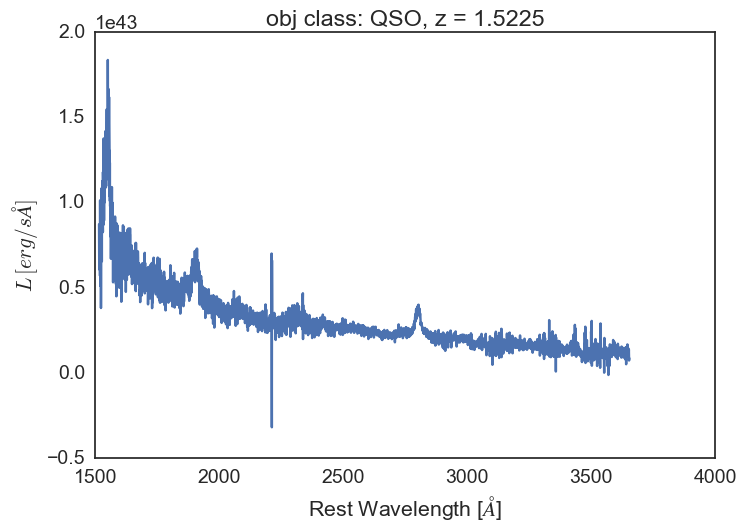

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_06_S24_1981_1513-spec-0473-51929-0634.txt
Object: Blind15A_06_S24_1981_1513
Blind15A_06_S24_1981_15
raMedian     141.271
decMedian    2.20899
Name: Blind15A_06_S24_1981_1513, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_07_N19_1511_3073-spec-3781-55243-0546.txt
Object: Blind15A_07_N19_1511_3073
Blind15A_07_N19_1511_30
raMedian      140.384
decMedian   -0.743724
Name: Blind15A_07_N19_1511_3073, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_07_S10_0556_1574-spec-3821-55535-0158.txt
Object: Blind15A_07_S10_0556_1574
Blind15A_07_S10_0556_15
raMedian       139.343
decMedian   -0.0152723
Name: Blind15A_07_S10_0556_1574, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_07_S19_1772_1161-spec-3821-55535-0017.txt
Object: Blind15A_07_S19_1772_1161
Blind15A_07_S19_1772_11
raMedian       140.246
decMedian    0.0591747
Name: Blind15A_07_S19_1772_1161, dtype: object


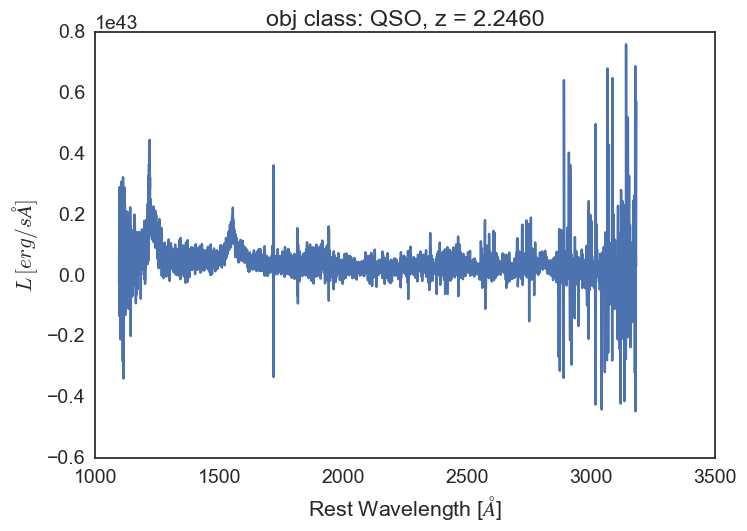

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_07_S3_0810_2604-spec-0472-51955-0120.txt
Object: Blind15A_07_S3_0810_2604
Blind15A_07_S3_0810_26
raMedian      139.263
decMedian   -0.198874
Name: Blind15A_07_S3_0810_2604, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_08_N13_1264_2017-spec-3781-55243-0211.txt
Object: Blind15A_08_N13_1264_2017
Blind15A_08_N13_1264_20
raMedian     141.464
decMedian   -2.56167
Name: Blind15A_08_N13_1264_2017, dtype: object


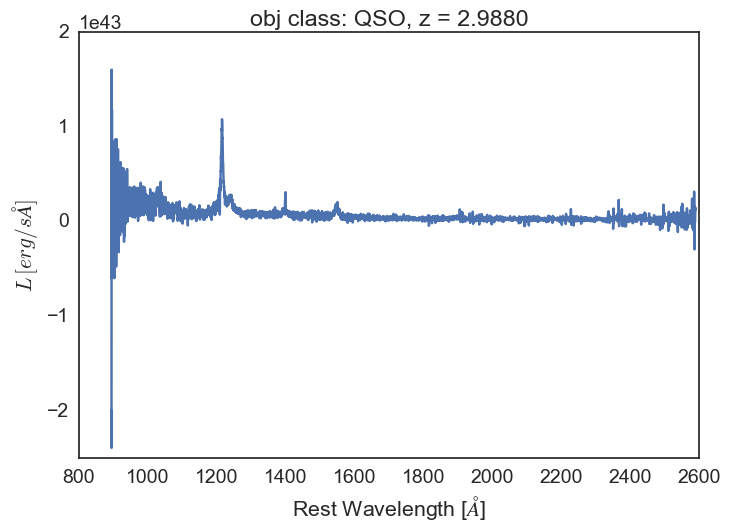

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_08_S6_0292_2223-spec-3781-55243-0268.txt
Object: Blind15A_08_S6_0292_2223
Blind15A_08_S6_0292_22
raMedian     141.324
decMedian    -2.1617
Name: Blind15A_08_S6_0292_2223, dtype: object


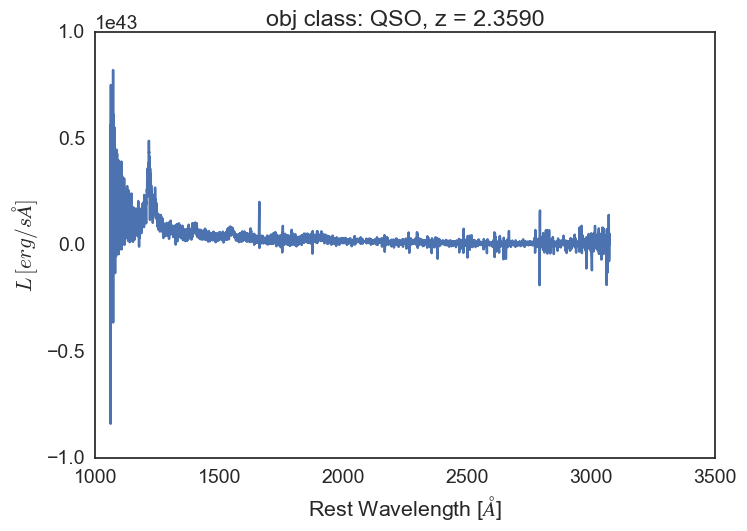

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_13_N4_1341_3077-spec-3767-55214-0380.txt
Object: Blind15A_13_N4_1341_3077
Blind15A_13_N4_1341_30
raMedian     143.074
decMedian   -2.40137
Name: Blind15A_13_N4_1341_3077, dtype: object


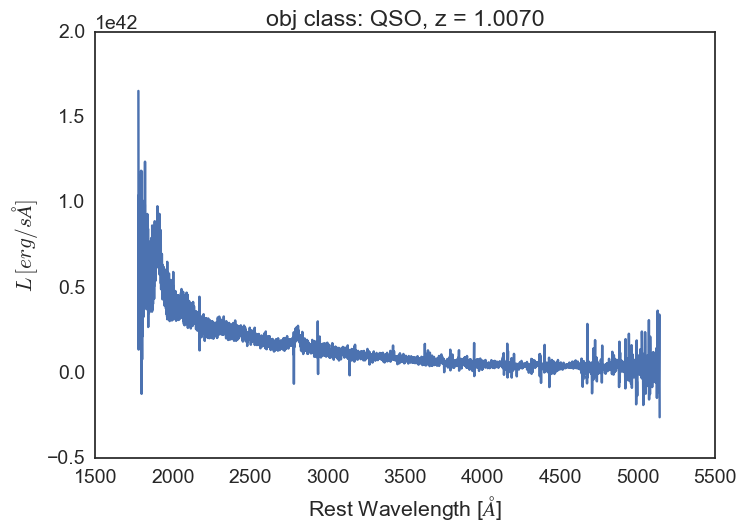

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_13_N6_1583_2188-spec-3767-55214-0300.txt
Object: Blind15A_13_N6_1583_2188
Blind15A_13_N6_1583_21
raMedian     143.631
decMedian   -2.41896
Name: Blind15A_13_N6_1583_2188, dtype: object


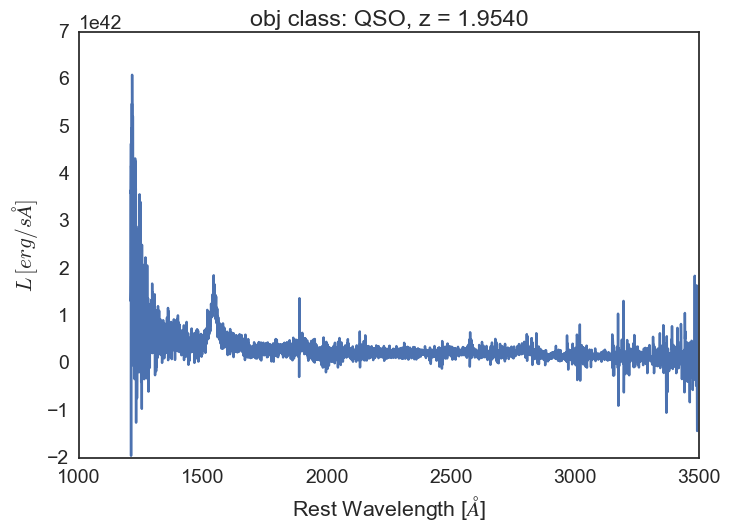

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_14_N3_1953_3186-spec-3823-55534-0175.txt
Object: Blind15A_14_N3_1953_3186
Blind15A_14_N3_1953_31
raMedian      141.616
decMedian   -0.445489
Name: Blind15A_14_N3_1953_3186, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_14_S3_0328_3476-spec-0474-52000-0147.txt
Object: Blind15A_14_S3_0328_3476
Blind15A_14_S3_0328_34
raMedian      141.637
decMedian   -0.161722
Name: Blind15A_14_S3_0328_3476, dtype: object


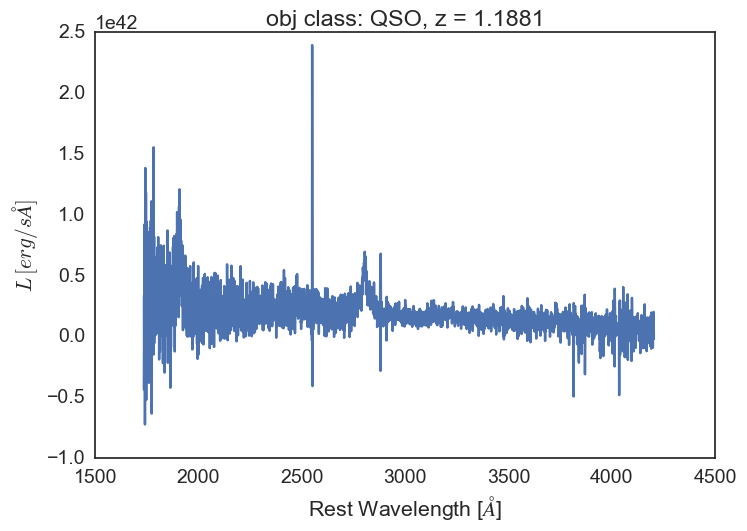

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_14_S5_0804_1193-spec-0474-52000-0120.txt
Object: Blind15A_14_S5_0804_1193
Blind15A_14_S5_0804_11
raMedian      142.093
decMedian   -0.196873
Name: Blind15A_14_S5_0804_1193, dtype: object


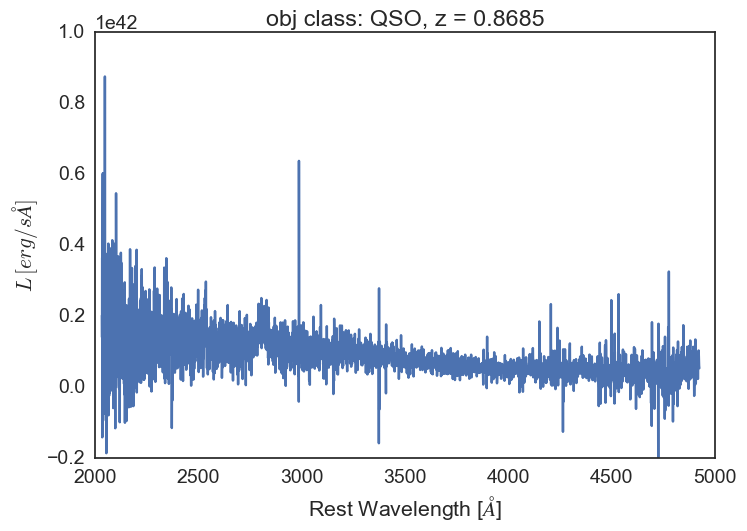

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_14_S8_1290_3787-spec-0474-52000-0486.txt
Object: Blind15A_14_S8_1290_3787
Blind15A_14_S8_1290_37
raMedian       141.194
decMedian   -0.0672319
Name: Blind15A_14_S8_1290_3787, dtype: object


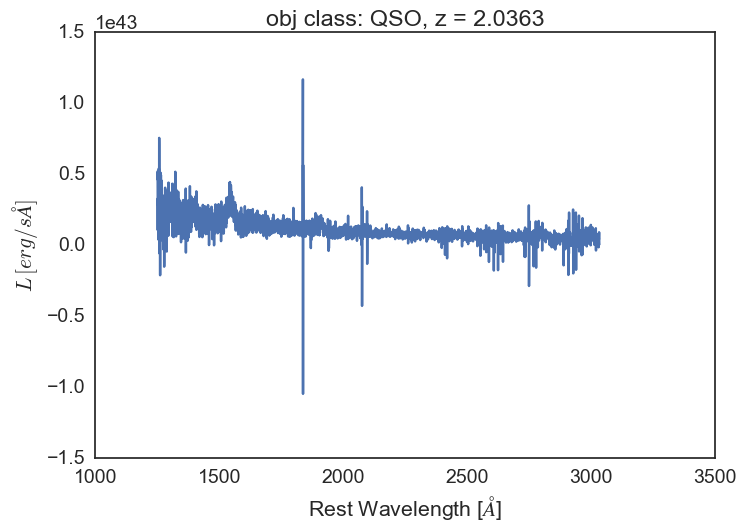

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_14_S8_1652_4062-spec-0474-52000-0491.txt
Object: Blind15A_14_S8_1652_4062
Blind15A_14_S8_1652_40
raMedian       141.214
decMedian   -0.0936861
Name: Blind15A_14_S8_1652_4062, dtype: object


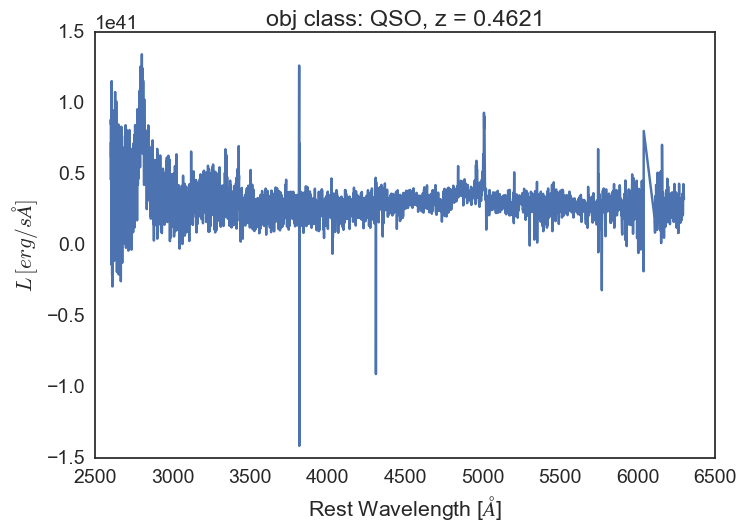

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_16_N6_1395_2945-spec-4736-55631-0100.txt
Object: Blind15A_16_N6_1395_2945
Blind15A_16_N6_1395_29
raMedian     145.995
decMedian    1.59496
Name: Blind15A_16_N6_1395_2945, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_16_N7_1005_3007-spec-4736-55631-0059.txt
Object: Blind15A_16_N7_1005_3007
Blind15A_16_N7_1005_30
raMedian      146.31
decMedian    1.62316
Name: Blind15A_16_N7_1005_3007, dtype: object


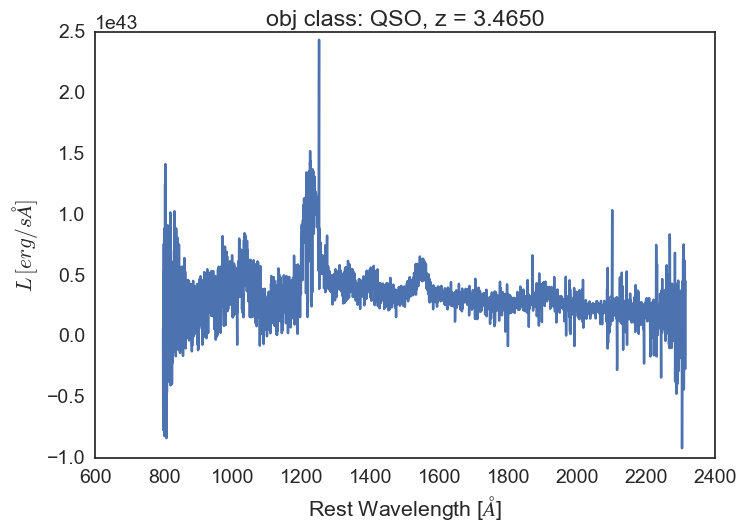

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_16_S18_1771_3151-spec-4736-55631-0154.txt
Object: Blind15A_16_S18_1771_3151
Blind15A_16_S18_1771_31
raMedian     145.855
decMedian    2.06146
Name: Blind15A_16_S18_1771_3151, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_16_S28_0578_3582-spec-4736-55631-0896.txt
Object: Blind15A_16_S28_0578_3582
Blind15A_16_S28_0578_35
raMedian     145.887
decMedian    2.47682
Name: Blind15A_16_S28_0578_3582, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_17_S29_0256_3348-spec-3826-55563-0528.txt
Object: Blind15A_17_S29_0256_3348
Blind15A_17_S29_0256_33
raMedian      143.938
decMedian    0.664703
Name: Blind15A_17_S29_0256_3348, dtype: object


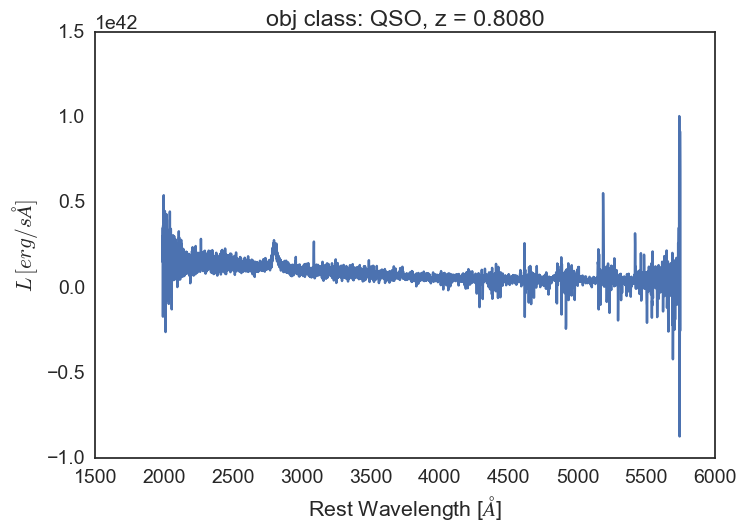

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_23_S2_1132_3673-spec-3782-55244-0070.txt
Object: Blind15A_23_S2_1132_3673
Blind15A_23_S2_1132_36
raMedian     147.116
decMedian   -2.22185
Name: Blind15A_23_S2_1132_3673, dtype: object


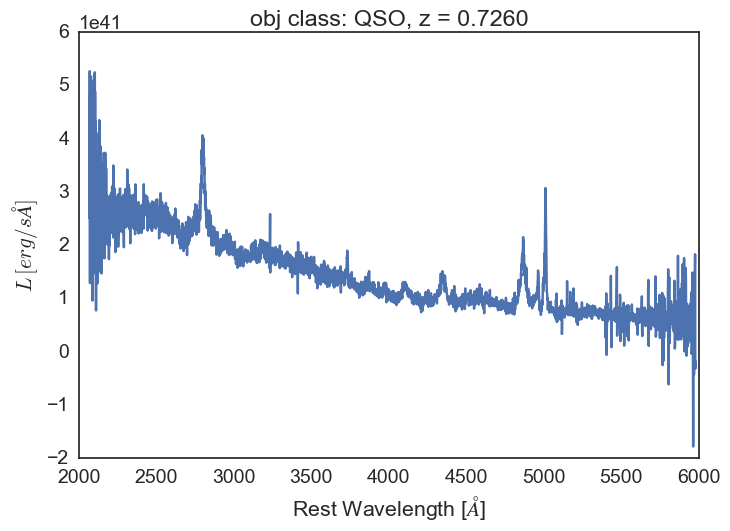

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_24_N13_1084_2008-spec-3828-55539-0422.txt
Object: Blind15A_24_N13_1084_2008
Blind15A_24_N13_1084_20
raMedian      148.162
decMedian   -0.317191
Name: Blind15A_24_N13_1084_2008, dtype: object


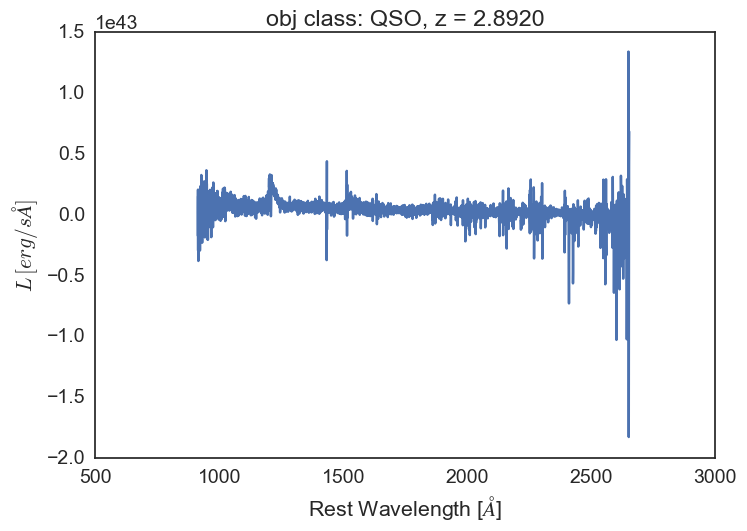

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_24_S16_0651_2125-spec-0266-51630-0628.txt
Object: Blind15A_24_S16_0651_2125
Blind15A_24_S16_0651_21
raMedian      147.239
decMedian    0.373865
Name: Blind15A_24_S16_0651_2125, dtype: object


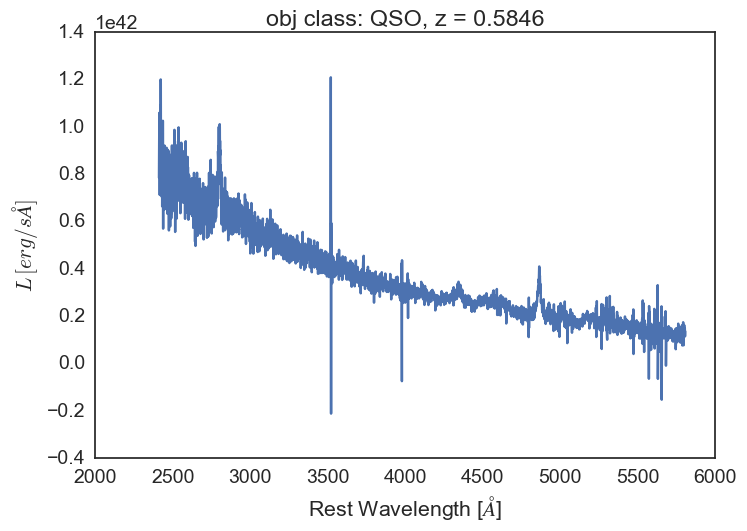

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_24_S17_0184_0641-spec-0480-51989-0046.txt
Object: Blind15A_24_S17_0184_0641
Blind15A_24_S17_0184_06
raMedian      147.442
decMedian    0.407662
Name: Blind15A_24_S17_0184_0641, dtype: object


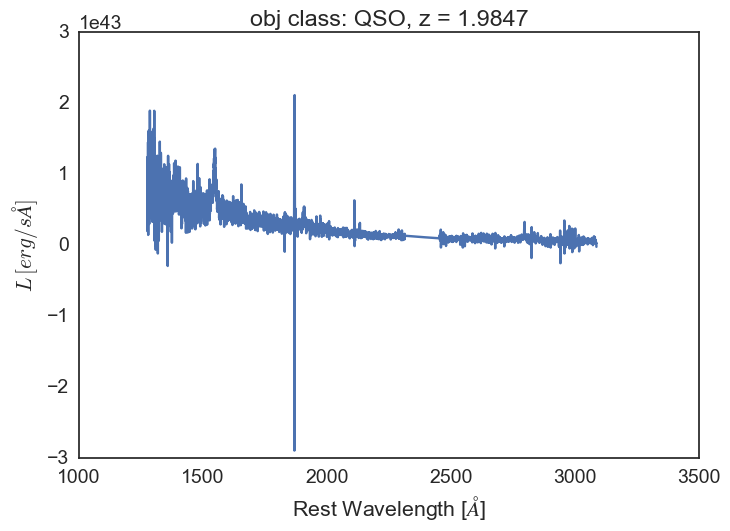

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_24_S23_1237_2954-spec-3828-55539-0522.txt
Object: Blind15A_24_S23_1237_2954
Blind15A_24_S23_1237_29
raMedian      147.766
decMedian    0.494691
Name: Blind15A_24_S23_1237_2954, dtype: object


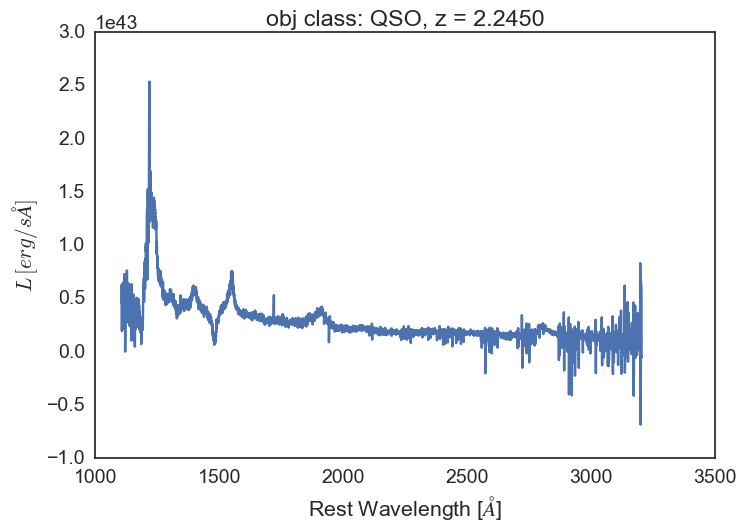

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_24_S5_0030_1283-spec-3827-55565-0196.txt
Object: Blind15A_24_S5_0030_1283
Blind15A_24_S5_0030_12
raMedian       147.644
decMedian    0.0894737
Name: Blind15A_24_S5_0030_1283, dtype: object


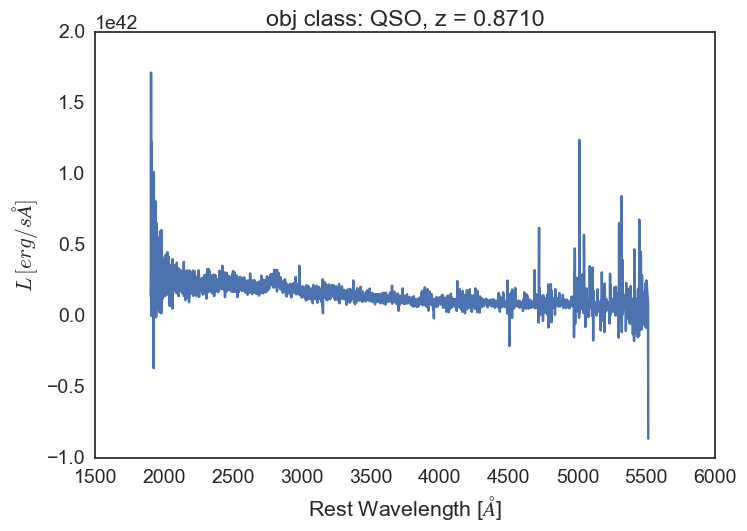

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_25_N5_1564_2315-spec-0481-51908-0475.txt
Object: Blind15A_25_N5_1564_2315
Blind15A_25_N5_1564_23
raMedian     147.949
decMedian    2.04328
Name: Blind15A_25_N5_1564_2315, dtype: object


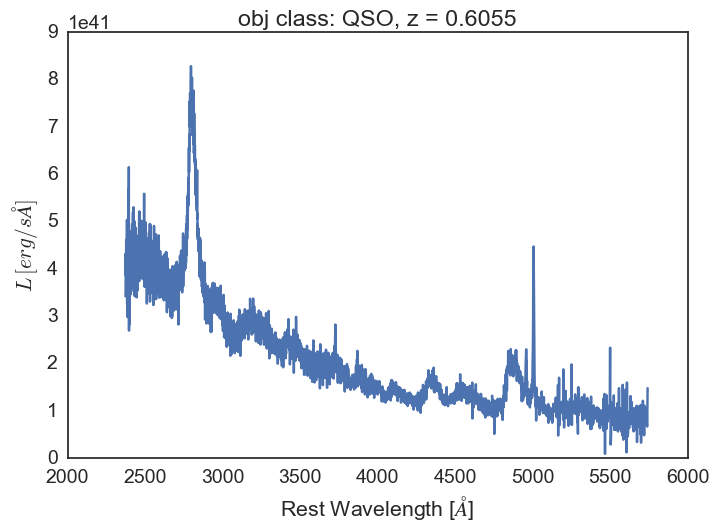

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_25_S18_1405_3505-spec-0481-51908-0450.txt
Object: Blind15A_25_S18_1405_3505
Blind15A_25_S18_1405_35
raMedian     148.193
decMedian    2.54846
Name: Blind15A_25_S18_1405_3505, dtype: object


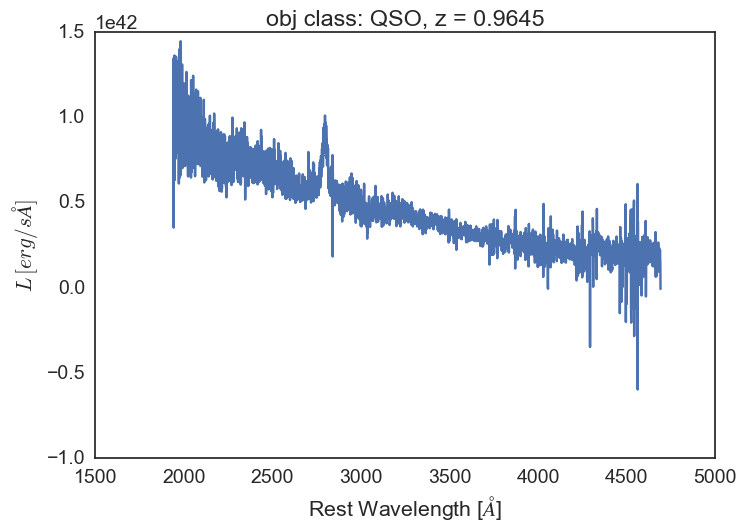

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_25_S20_0901_3275-spec-0481-51908-0327.txt
Object: Blind15A_25_S20_0901_3275
Blind15A_25_S20_0901_32
raMedian     147.087
decMedian    2.75044
Name: Blind15A_25_S20_0901_3275, dtype: object


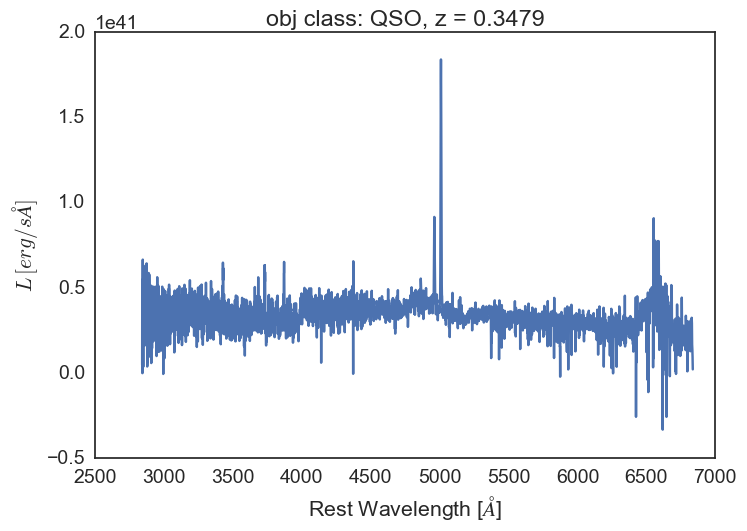

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_25_S20_1595_1331-spec-4736-55631-0996.txt
Object: Blind15A_25_S20_1595_1331
Blind15A_25_S20_1595_13
raMedian     146.945
decMedian    2.69973
Name: Blind15A_25_S20_1595_1331, dtype: object


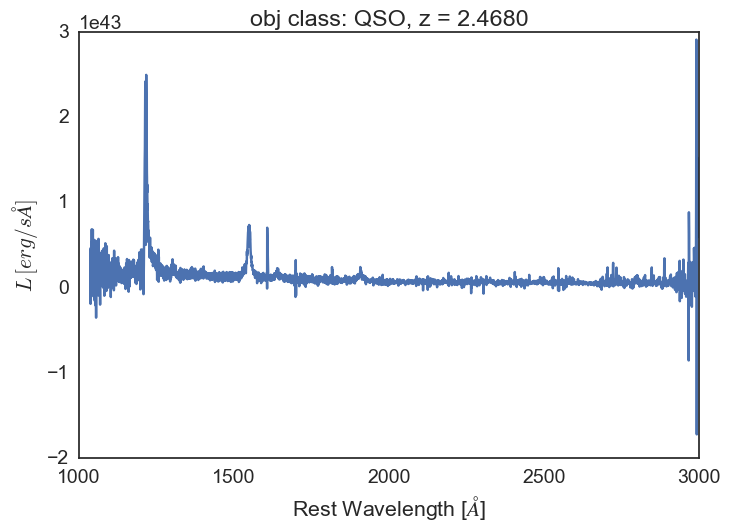

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_N25_0106_4011-spec-4737-55630-0258.txt
Object: Blind15A_26_N25_0106_4011
Blind15A_26_N25_0106_40
raMedian     149.796
decMedian     1.5402
Name: Blind15A_26_N25_0106_4011, dtype: object


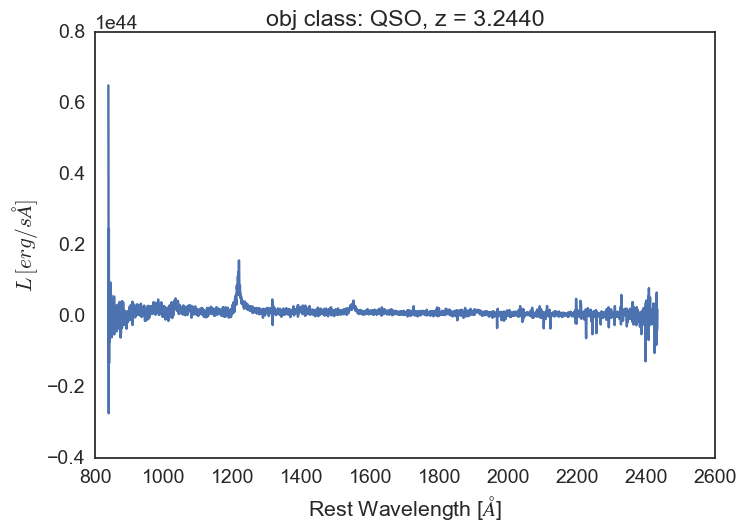

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_N3_0914_1699-spec-4737-55630-0263.txt
Object: Blind15A_26_N3_0914_1699
Blind15A_26_N3_0914_16
raMedian     149.782
decMedian    2.13922
Name: Blind15A_26_N3_0914_1699, dtype: object


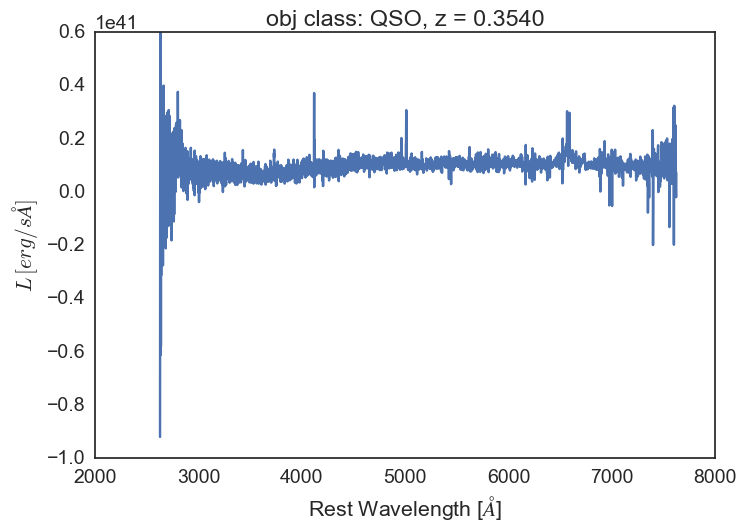

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_N4_1000_3140-spec-4737-55630-0187.txt
Object: Blind15A_26_N4_1000_3140
Blind15A_26_N4_1000_31
raMedian     150.199
decMedian    2.13239
Name: Blind15A_26_N4_1000_3140, dtype: object


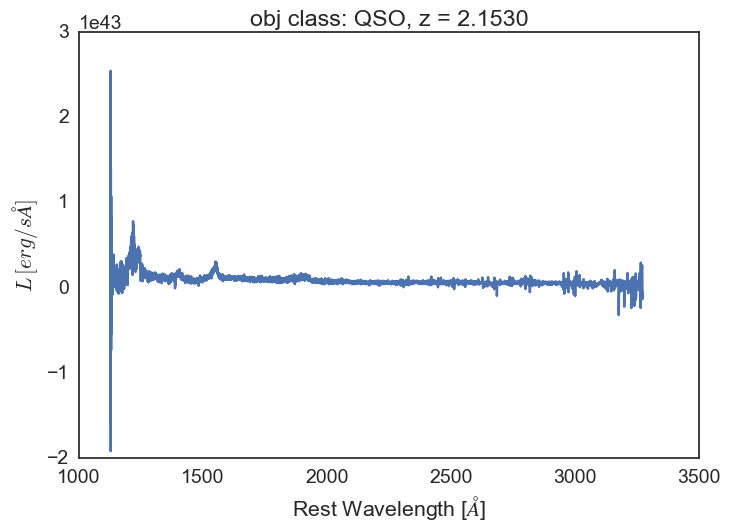

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S13_1227_3302-spec-0501-52235-0483.txt
Object: Blind15A_26_S13_1227_3302
Blind15A_26_S13_1227_33
raMedian     150.988
decMedian    2.44404
Name: Blind15A_26_S13_1227_3302, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S16_0470_3958-spec-4737-55630-0811.txt
Object: Blind15A_26_S16_0470_3958
Blind15A_26_S16_0470_39
raMedian     150.104
decMedian    2.66558
Name: Blind15A_26_S16_0470_3958, dtype: object


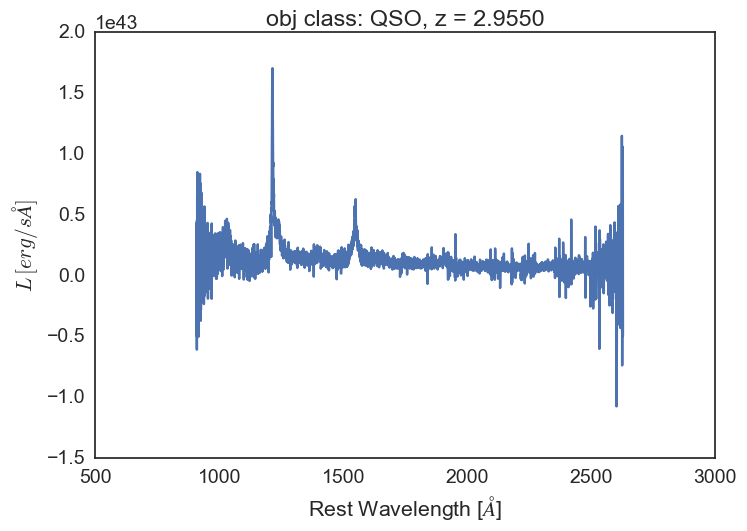

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S16_1510_3278-spec-0501-52235-0346.txt
Object: Blind15A_26_S16_1510_3278
Blind15A_26_S16_1510_32
raMedian     150.054
decMedian     2.5896
Name: Blind15A_26_S16_1510_3278, dtype: object


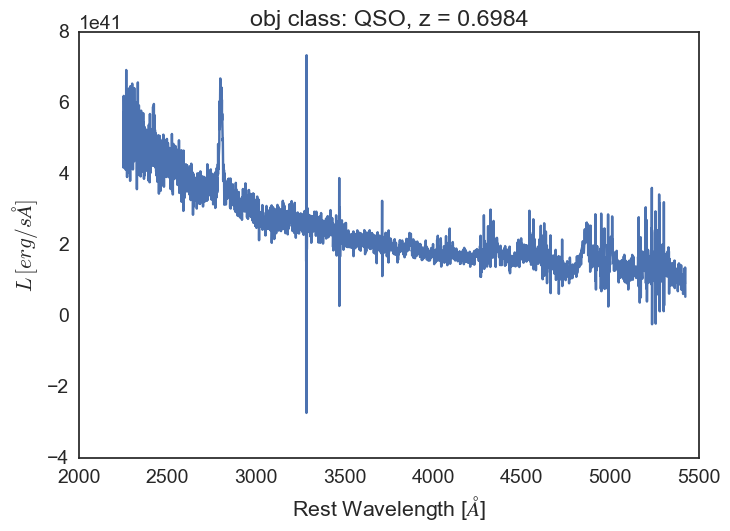

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S19_0104_1975-spec-0501-52235-0453.txt
Object: Blind15A_26_S19_0104_1975
Blind15A_26_S19_0104_19
raMedian     150.892
decMedian    2.69073
Name: Blind15A_26_S19_0104_1975, dtype: object


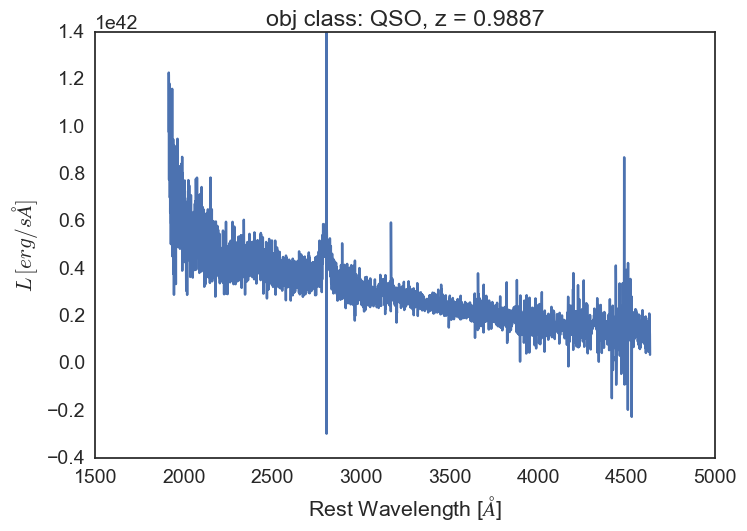

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S26_0370_2754-spec-4737-55630-0801.txt
Object: Blind15A_26_S26_0370_2754
Blind15A_26_S26_0370_27
raMedian     150.016
decMedian    3.00144
Name: Blind15A_26_S26_0370_2754, dtype: object


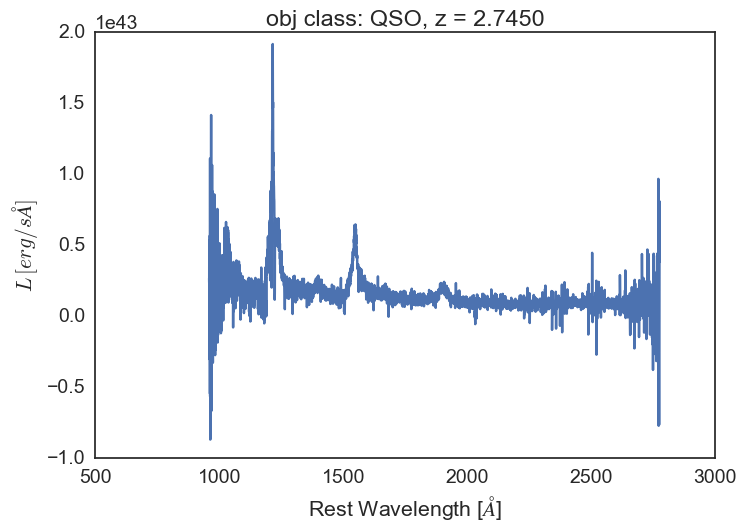

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_26_S8_1463_2405-spec-0500-51994-0480.txt
Object: Blind15A_26_S8_1463_2405
Blind15A_26_S8_1463_24
raMedian     149.368
decMedian    2.42838
Name: Blind15A_26_S8_1463_2405, dtype: object


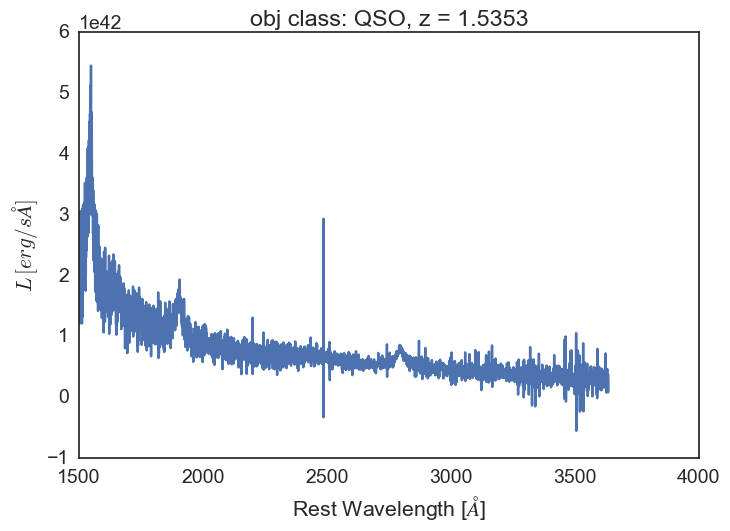

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_27_N15_1165_1098-spec-3828-55539-0222.txt
Object: Blind15A_27_N15_1165_1098
Blind15A_27_N15_1165_10
raMedian      149.162
decMedian   -0.268104
Name: Blind15A_27_N15_1165_1098, dtype: object


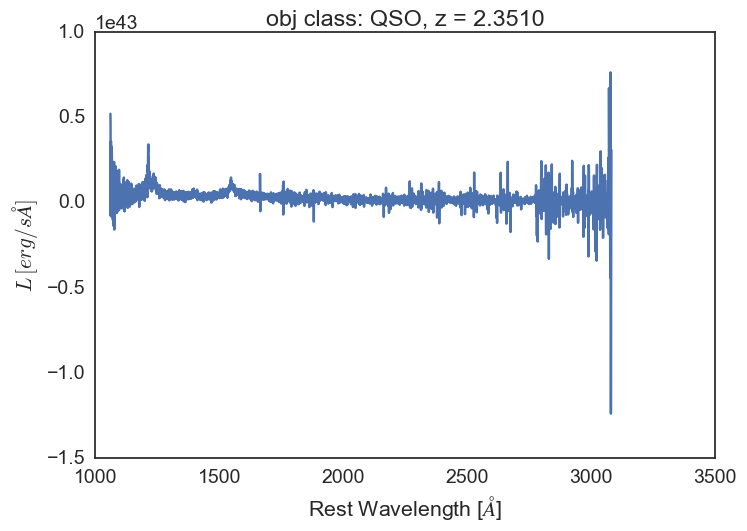

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_27_N8_0738_3653-spec-3828-55539-0272.txt
Object: Blind15A_27_N8_0738_3653
Blind15A_27_N8_0738_36
raMedian       149.038
decMedian   -0.0723328
Name: Blind15A_27_N8_0738_3653, dtype: object


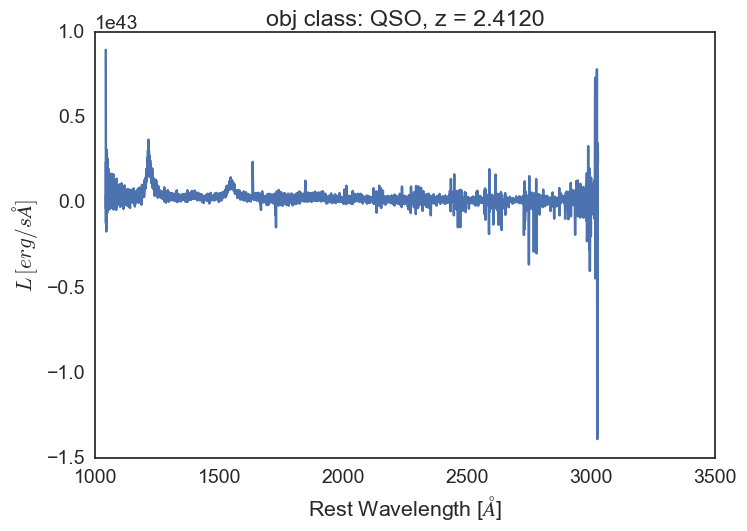

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_27_S26_1101_2201-spec-3828-55539-0878.txt
Object: Blind15A_27_S26_1101_2201
Blind15A_27_S26_1101_22
raMedian      149.555
decMedian    0.888103
Name: Blind15A_27_S26_1101_2201, dtype: object


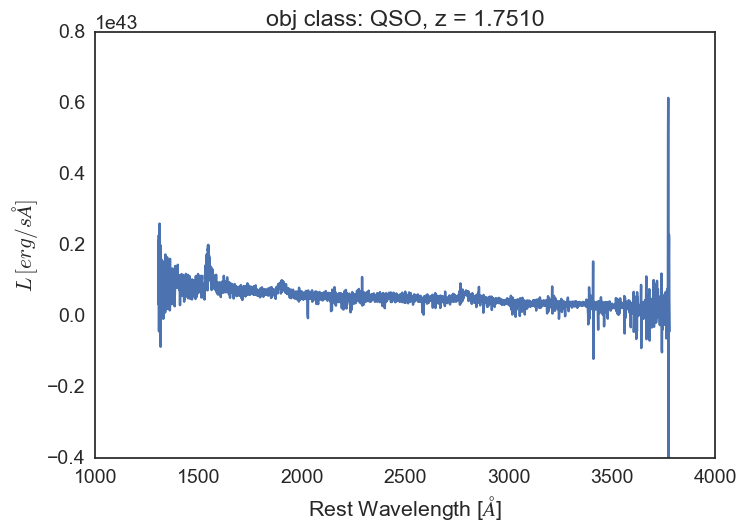

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_27_S27_0402_2424-spec-3828-55539-0958.txt
Object: Blind15A_27_S27_0402_2424
Blind15A_27_S27_0402_24
raMedian      149.882
decMedian    0.938722
Name: Blind15A_27_S27_0402_2424, dtype: object


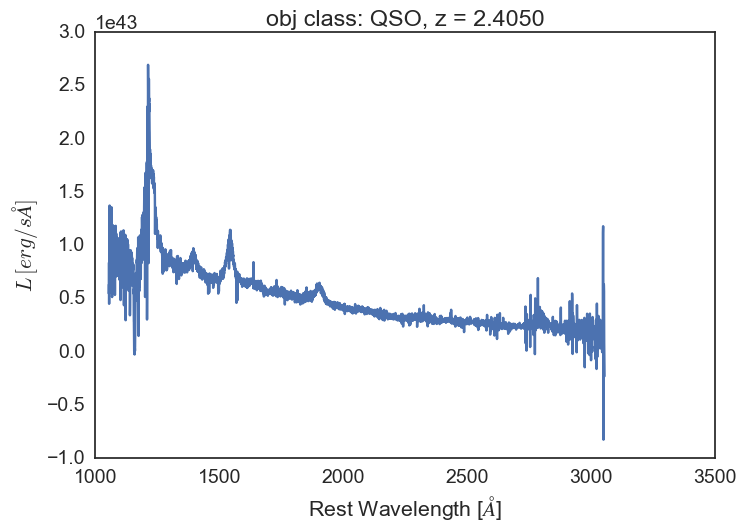

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_27_S28_1793_1603-spec-3829-55300-0560.txt
Object: Blind15A_27_S28_1793_1603
Blind15A_27_S28_1793_16
raMedian      150.132
decMedian    0.836831
Name: Blind15A_27_S28_1793_1603, dtype: object


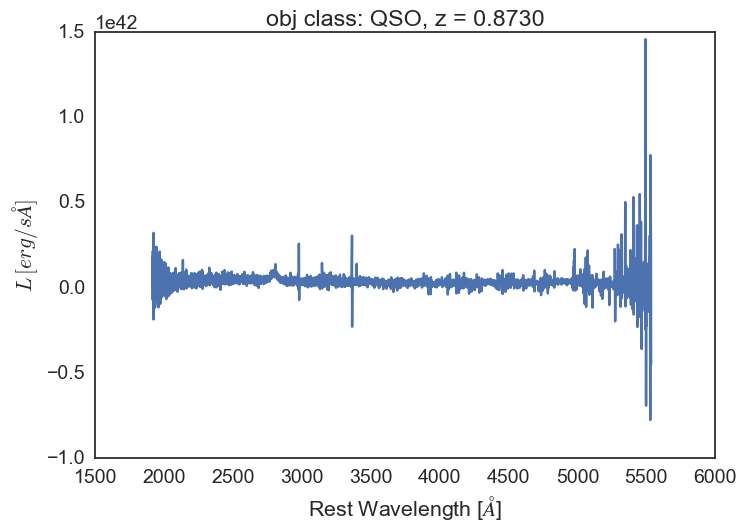

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_28_N21_0738_3901-spec-3783-55246-0372.txt
Object: Blind15A_28_N21_0738_3901
Blind15A_28_N21_0738_39
raMedian     149.909
decMedian   -2.64769
Name: Blind15A_28_N21_0738_3901, dtype: object


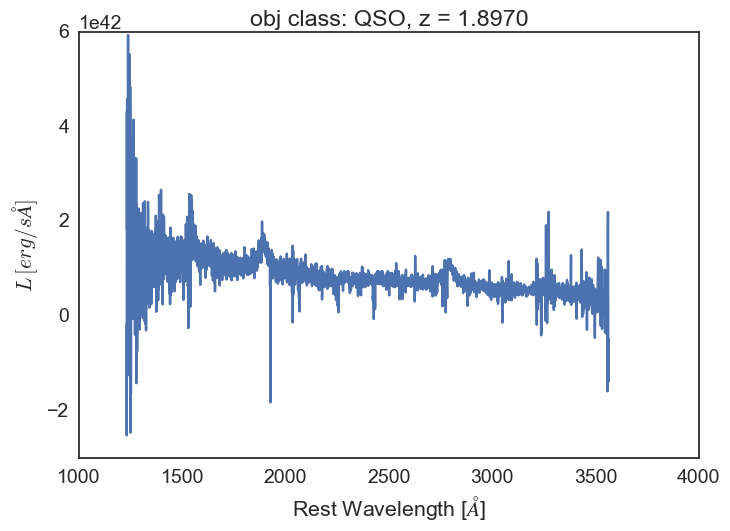

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_28_S22_1200_2160-spec-3783-55246-0714.txt
Object: Blind15A_28_S22_1200_2160
Blind15A_28_S22_1200_21
raMedian     150.094
decMedian    -1.5291
Name: Blind15A_28_S22_1200_2160, dtype: object


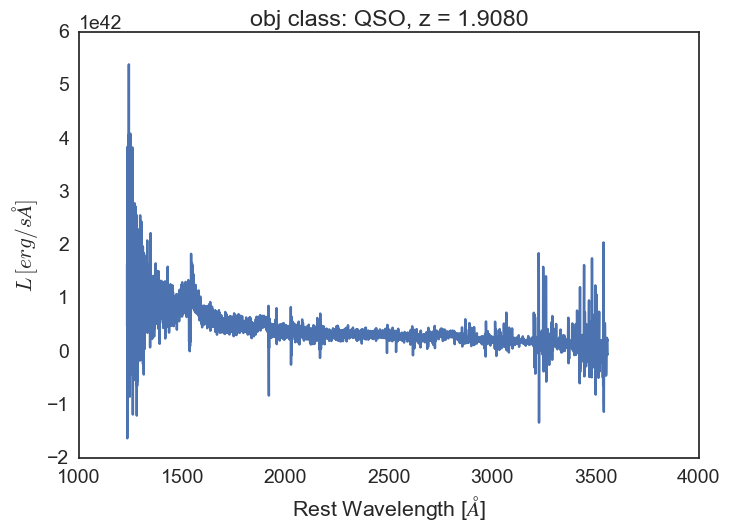

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_33_N20_0376_2361-spec-3769-55240-0416.txt
Object: Blind15A_33_N20_0376_2361
Blind15A_33_N20_0376_23
raMedian     151.591
decMedian   -2.61981
Name: Blind15A_33_N20_0376_2361, dtype: object


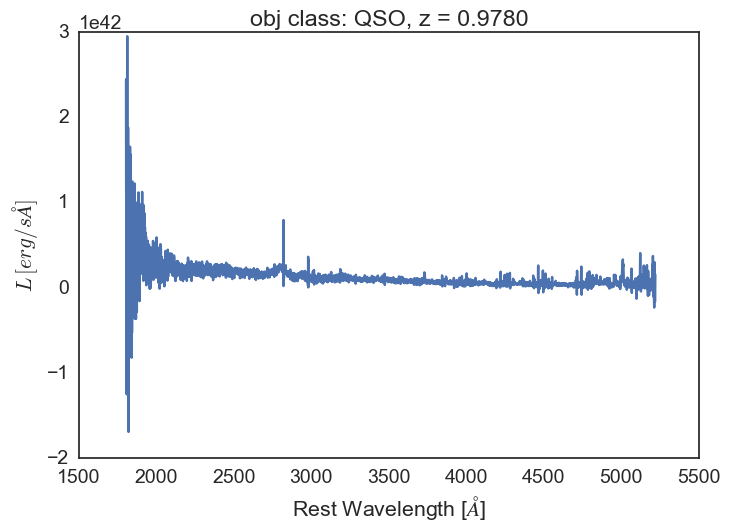

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_33_S3_0177_2290-spec-3769-55240-0394.txt
Object: Blind15A_33_S3_0177_2290
Blind15A_33_S3_0177_22
raMedian     151.897
decMedian   -1.94745
Name: Blind15A_33_S3_0177_2290, dtype: object


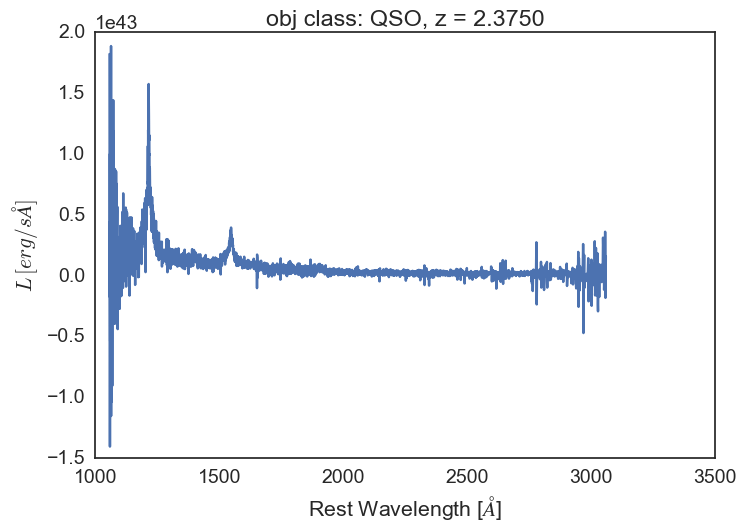

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_34_N13_1414_0613-spec-3830-55574-0068.txt
Object: Blind15A_34_N13_1414_0613
Blind15A_34_N13_1414_06
raMedian       153.79
decMedian   -0.272592
Name: Blind15A_34_N13_1414_0613, dtype: object


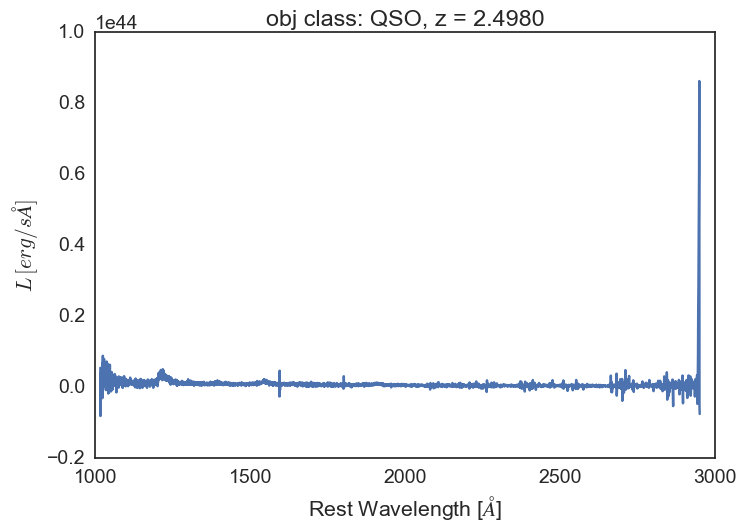

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_34_N25_1405_1774-spec-3769-55240-0770.txt
Object: Blind15A_34_N25_1405_1774
Blind15A_34_N25_1405_17
raMedian      152.632
decMedian   -0.763802
Name: Blind15A_34_N25_1405_1774, dtype: object


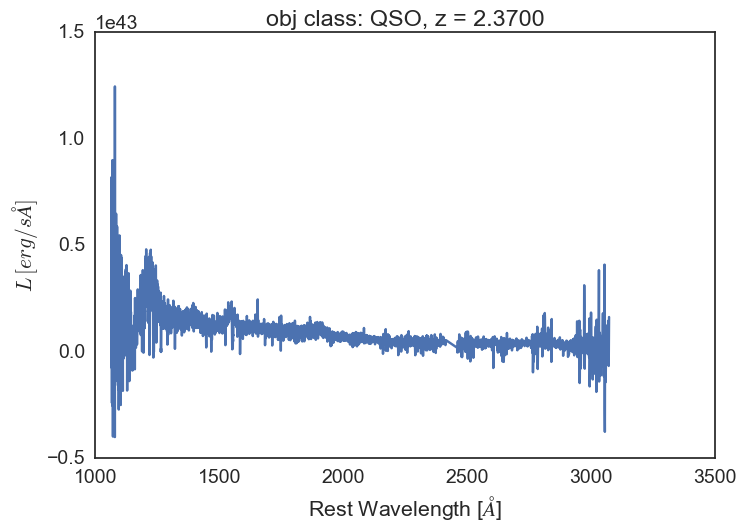

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_34_N5_0305_1083-spec-3830-55574-0154.txt
Object: Blind15A_34_N5_0305_1083
Blind15A_34_N5_0305_10
raMedian       153.359
decMedian   -0.0266981
Name: Blind15A_34_N5_0305_1083, dtype: object


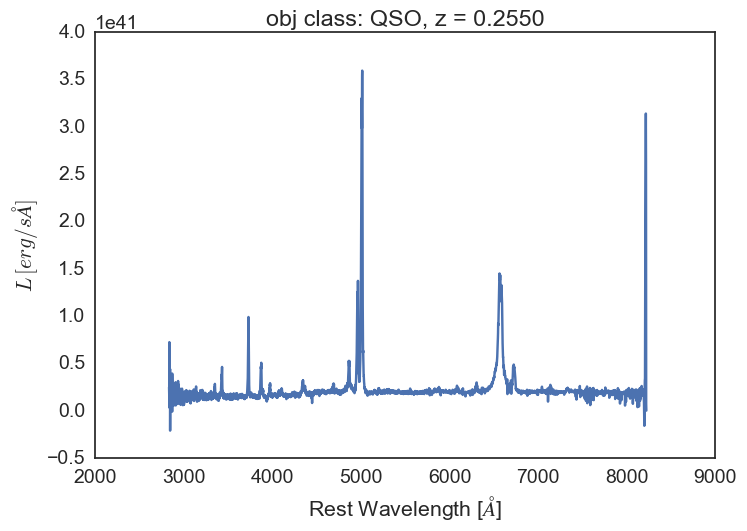

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_34_S6_1247_3461-spec-0270-51909-0640.txt
Object: Blind15A_34_S6_1247_3461
Blind15A_34_S6_1247_34
raMedian       153.844
decMedian    0.0687019
Name: Blind15A_34_S6_1247_3461, dtype: object


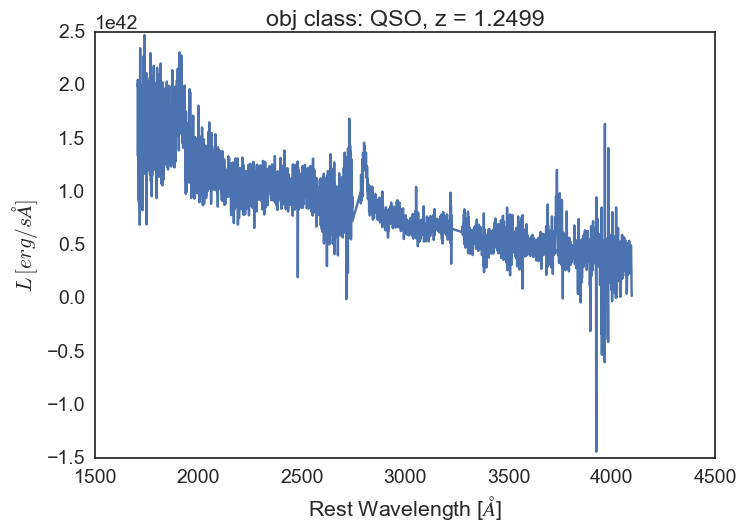

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_35_N19_0309_3225-spec-0502-51957-0114.txt
Object: Blind15A_35_N19_0309_3225
Blind15A_35_N19_0309_32
raMedian     153.247
decMedian    1.74054
Name: Blind15A_35_N19_0309_3225, dtype: object


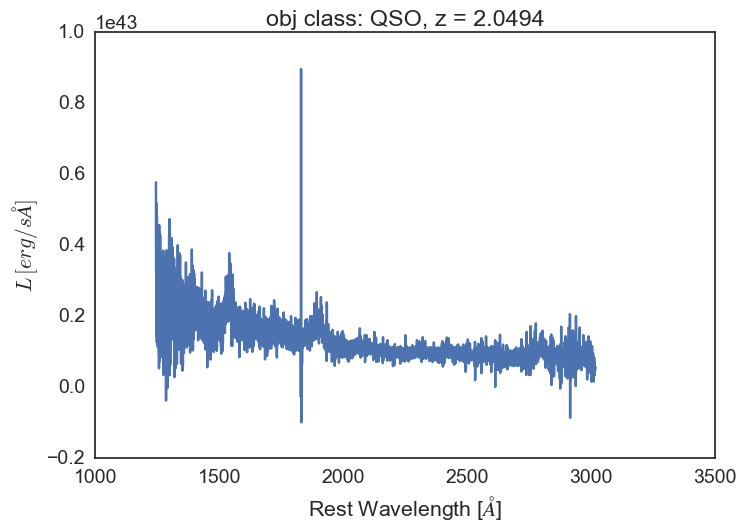

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_35_N27_1717_2933-spec-3830-55574-0666.txt
Object: Blind15A_35_N27_1717_2933
Blind15A_35_N27_1717_29
raMedian     152.603
decMedian    1.30931
Name: Blind15A_35_N27_1717_2933, dtype: object


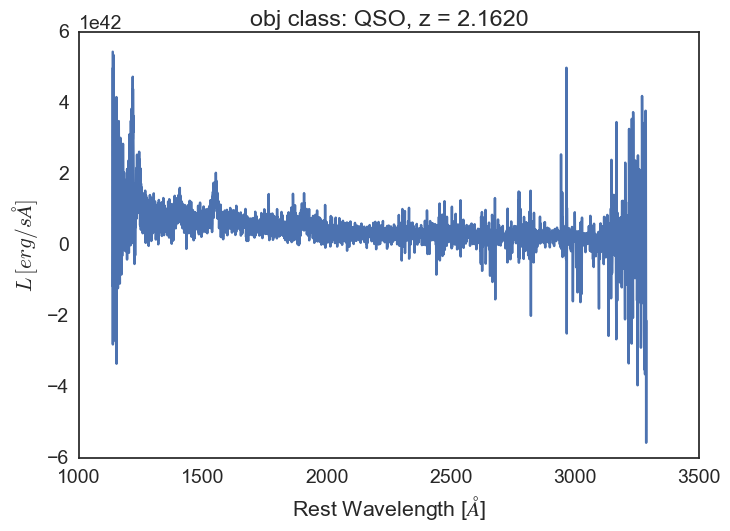

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_35_N4_1339_1422-spec-0501-52235-0031.txt
Object: Blind15A_35_N4_1339_1422
Blind15A_35_N4_1339_14
raMedian     152.338
decMedian    1.99484
Name: Blind15A_35_N4_1339_1422, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_35_S14_0298_1916-spec-4738-55650-0359.txt
Object: Blind15A_35_S14_0298_1916
Blind15A_35_S14_0298_19
raMedian     151.598
decMedian     2.5645
Name: Blind15A_35_S14_0298_1916, dtype: object


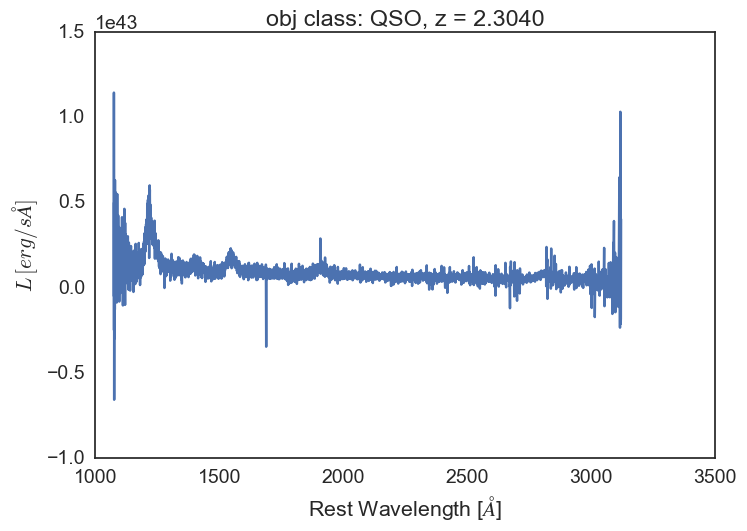

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_36_N14_1260_3733-spec-0503-51999-0303.txt
Object: Blind15A_36_N14_1260_3733
Blind15A_36_N14_1260_37
raMedian      154.04
decMedian    1.67169
Name: Blind15A_36_N14_1260_3733, dtype: object


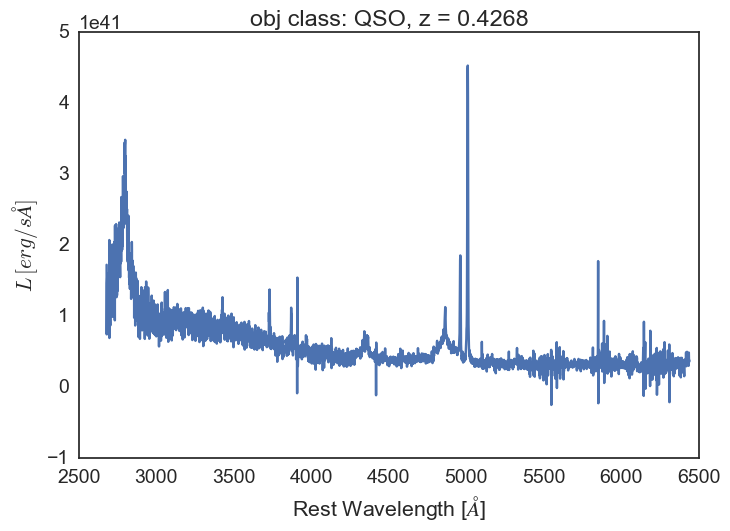

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_36_N4_0125_3420-spec-0503-51999-0199.txt
Object: Blind15A_36_N4_0125_3420
Blind15A_36_N4_0125_34
raMedian     154.795
decMedian     2.0829
Name: Blind15A_36_N4_0125_3420, dtype: object


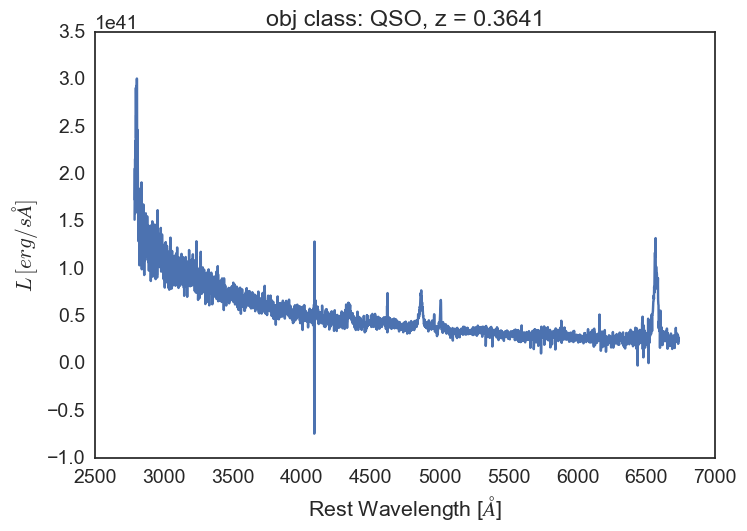

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_37_N18_0313_0558-spec-0272-51941-0223.txt
Object: Blind15A_37_N18_0313_0558
Blind15A_37_N18_0313_05
raMedian      155.745
decMedian   -0.260576
Name: Blind15A_37_N18_0313_0558, dtype: object


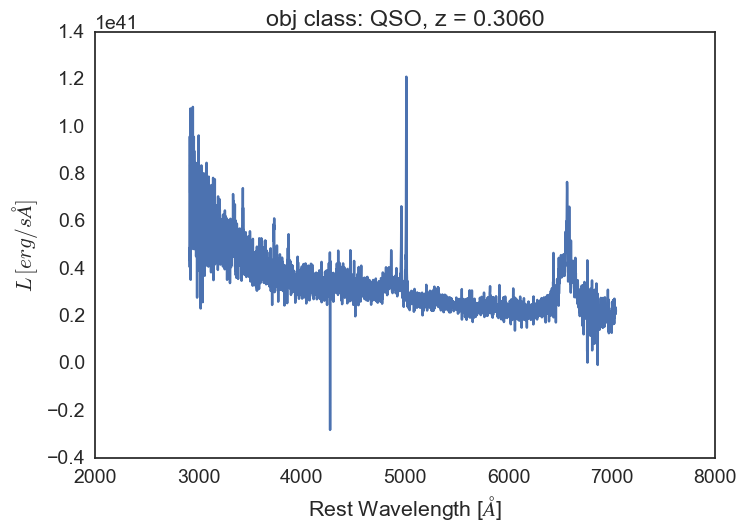

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_37_N3_1779_2155-spec-3831-55543-0236.txt
Object: Blind15A_37_N3_1779_2155
Blind15A_37_N3_1779_21
raMedian       155.084
decMedian   -0.0381612
Name: Blind15A_37_N3_1779_2155, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_37_S19_0544_1835-spec-3831-55543-0986.txt
Object: Blind15A_37_S19_0544_1835
Blind15A_37_S19_0544_18
raMedian      156.149
decMedian    0.544804
Name: Blind15A_37_S19_0544_1835, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_37_S22_0735_3102-spec-0271-51883-0616.txt
Object: Blind15A_37_S22_0735_3102
Blind15A_37_S22_0735_31
raMedian      155.465
decMedian    0.696525
Name: Blind15A_37_S22_0735_3102, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_37_S31_0747_2738-spec-0272-51941-0363.txt
Object: Blind15A_37_S31_0747_2738
Blind15A_37_S31_0747_27
raMedian     155.749
decMedian     1.0233
Name: Blind15A_37_S31_0747_2738, dtype: object


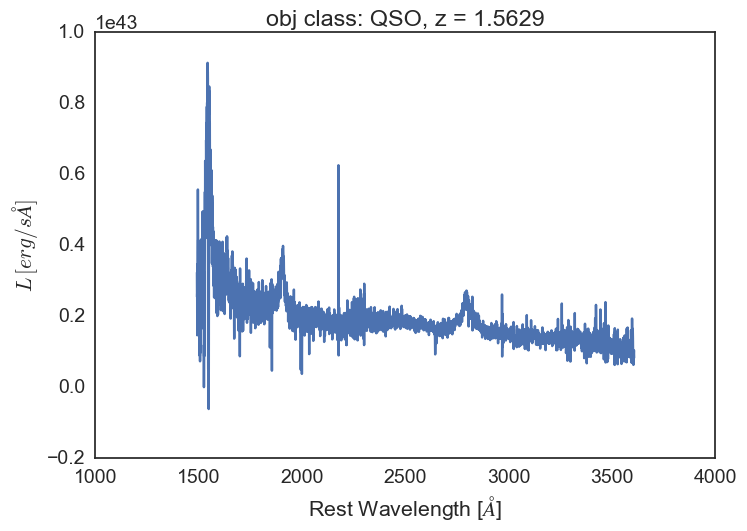

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_38_N15_0185_0962-spec-3784-55269-0344.txt
Object: Blind15A_38_N15_0185_0962
Blind15A_38_N15_0185_09
raMedian     153.775
decMedian    -2.4414
Name: Blind15A_38_N15_0185_0962, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_38_N23_0086_1500-spec-3784-55269-0110.txt
Object: Blind15A_38_N23_0086_1500
Blind15A_38_N23_0086_15
raMedian     154.592
decMedian   -2.59973
Name: Blind15A_38_N23_0086_1500, dtype: object


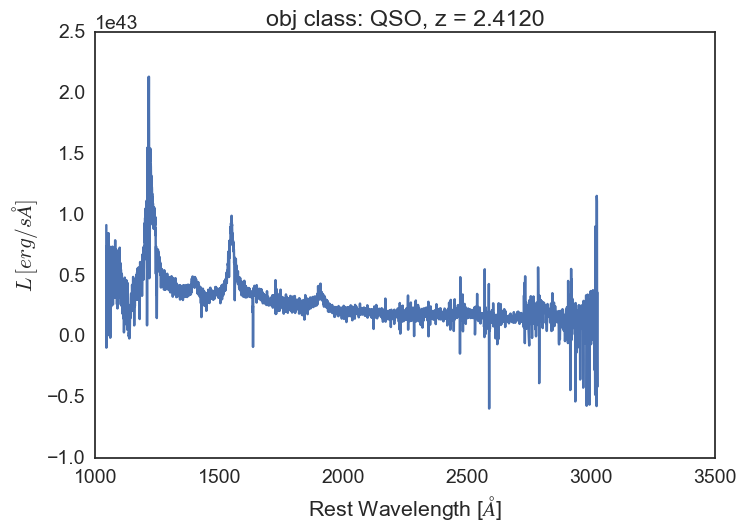

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_43_N16_1236_3699-spec-3770-55234-0074.txt
Object: Blind15A_43_N16_1236_3699
Blind15A_43_N16_1236_36
raMedian     156.818
decMedian   -2.56504
Name: Blind15A_43_N16_1236_3699, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_43_N17_1942_3873-spec-3785-55273-0424.txt
Object: Blind15A_43_N17_1942_3873
Blind15A_43_N17_1942_38
raMedian     157.142
decMedian   -2.61679
Name: Blind15A_43_N17_1942_3873, dtype: object


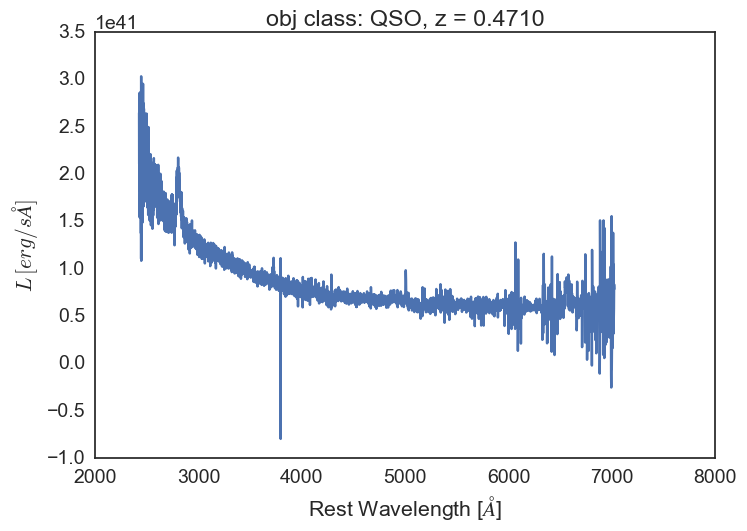

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_43_N8_1794_3637-spec-3770-55234-0232.txt
Object: Blind15A_43_N8_1794_3637
Blind15A_43_N8_1794_36
raMedian     156.191
decMedian   -2.44009
Name: Blind15A_43_N8_1794_3637, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_43_S2_1649_1134-spec-3770-55234-0778.txt
Object: Blind15A_43_S2_1649_1134
Blind15A_43_S2_1649_11
raMedian     156.164
decMedian   -2.09995
Name: Blind15A_43_S2_1649_1134, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_44_N9_0123_3265-spec-0273-51957-0237.txt
Object: Blind15A_44_N9_0123_3265
Blind15A_44_N9_0123_32
raMedian      157.631
decMedian   -0.317325
Name: Blind15A_44_N9_0123_3265, dtype: object


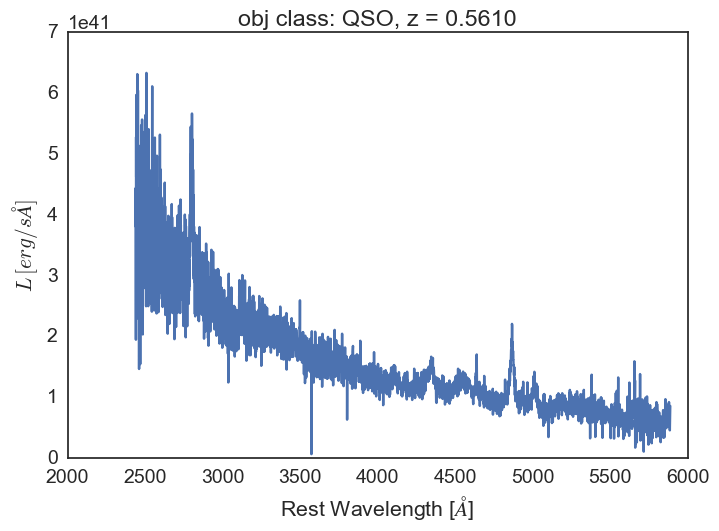

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_45_N5_0625_3856-spec-4739-55644-0222.txt
Object: Blind15A_45_N5_0625_3856
Blind15A_45_N5_0625_38
raMedian     157.298
decMedian    1.81034
Name: Blind15A_45_N5_0625_3856, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_45_S17_1763_2745-spec-0504-52316-0497.txt
Object: Blind15A_45_S17_1763_2745
Blind15A_45_S17_1763_27
raMedian     157.061
decMedian    2.22149
Name: Blind15A_45_S17_1763_2745, dtype: object


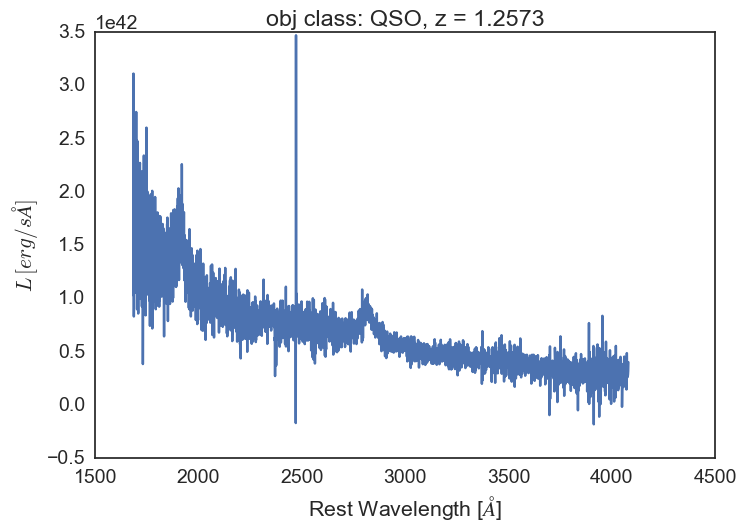

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_45_S19_0580_3920-spec-4739-55644-0896.txt
Object: Blind15A_45_S19_0580_3920
Blind15A_45_S19_0580_39
raMedian     157.768
decMedian    2.30618
Name: Blind15A_45_S19_0580_3920, dtype: object


/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_45_S5_1602_0882-spec-4739-55644-0238.txt
Object: Blind15A_45_S5_1602_0882
Blind15A_45_S5_1602_08
raMedian     157.08
decMedian     1.904
Name: Blind15A_45_S5_1602_0882, dtype: object


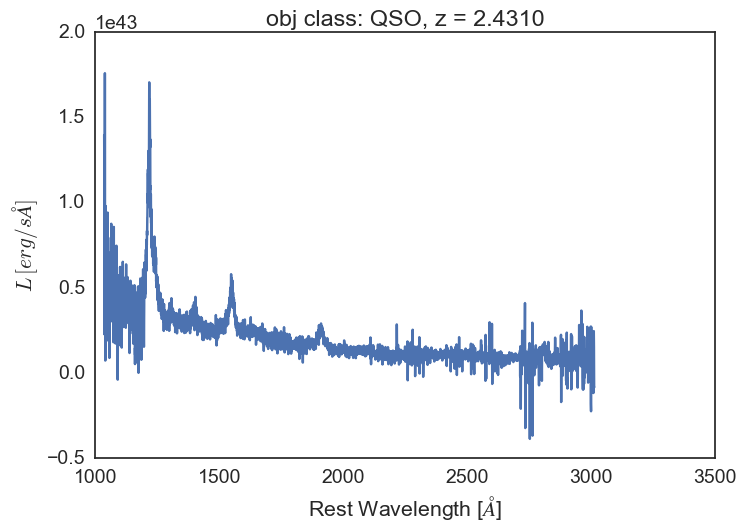

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_46_S11_0676_2858-spec-0505-52317-0153.txt
Object: Blind15A_46_S11_0676_2858
Blind15A_46_S11_0676_28
raMedian     159.381
decMedian    2.13847
Name: Blind15A_46_S11_0676_2858, dtype: object


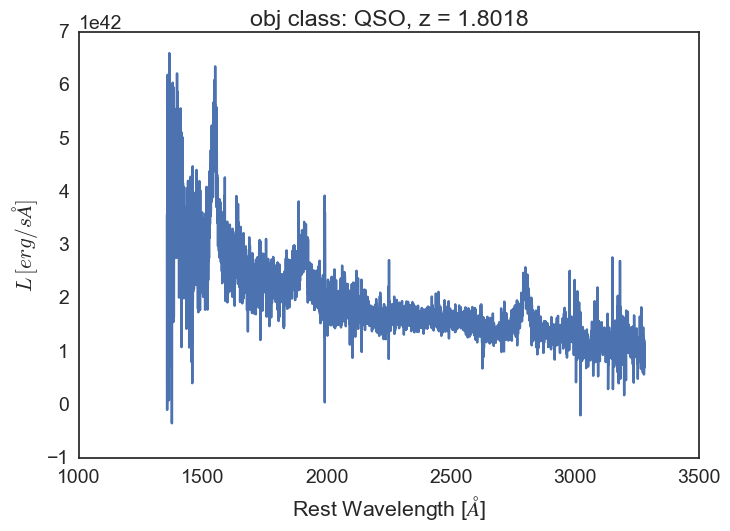

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_47_N4_0561_2176-spec-0275-51910-0306.txt
Object: Blind15A_47_N4_0561_2176
Blind15A_47_N4_0561_21
raMedian       160.389
decMedian   -0.0433692
Name: Blind15A_47_N4_0561_2176, dtype: object


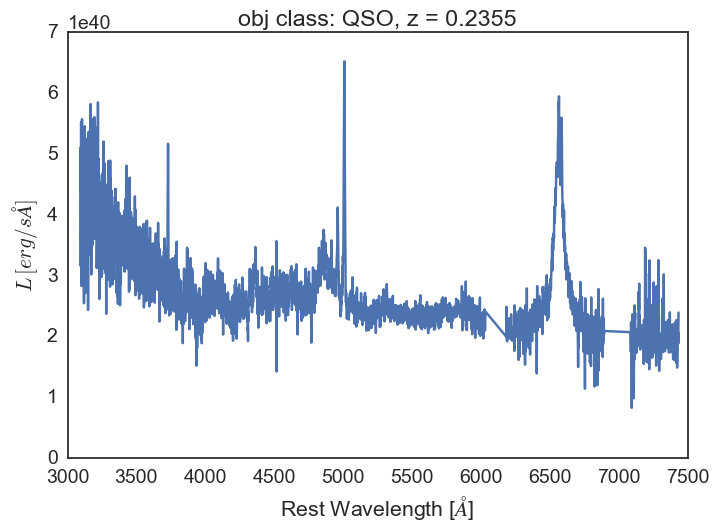

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_47_N6_0738_2785-spec-0274-51913-0031.txt
Object: Blind15A_47_N6_0738_2785
Blind15A_47_N6_0738_27
raMedian       161.056
decMedian   -0.0568122
Name: Blind15A_47_N6_0738_2785, dtype: object


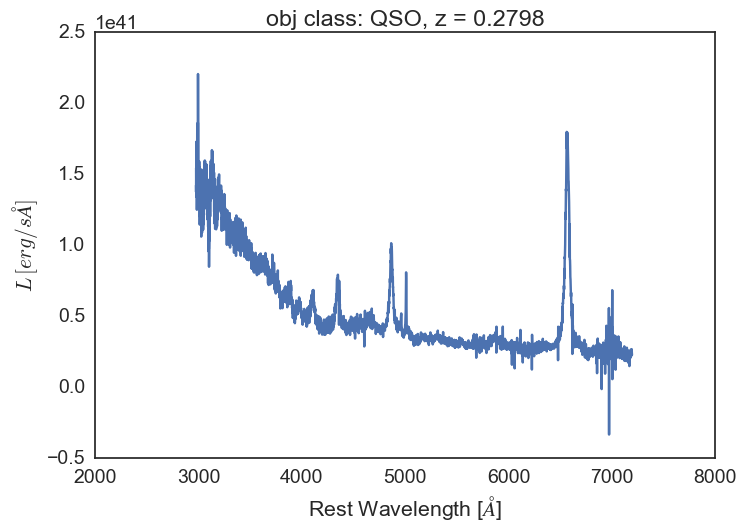

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_47_N6_1930_1173-spec-3834-56014-0326.txt
Object: Blind15A_47_N6_1930_1173
Blind15A_47_N6_1930_11
raMedian      160.938
decMedian   -0.143899
Name: Blind15A_47_N6_1930_1173, dtype: object


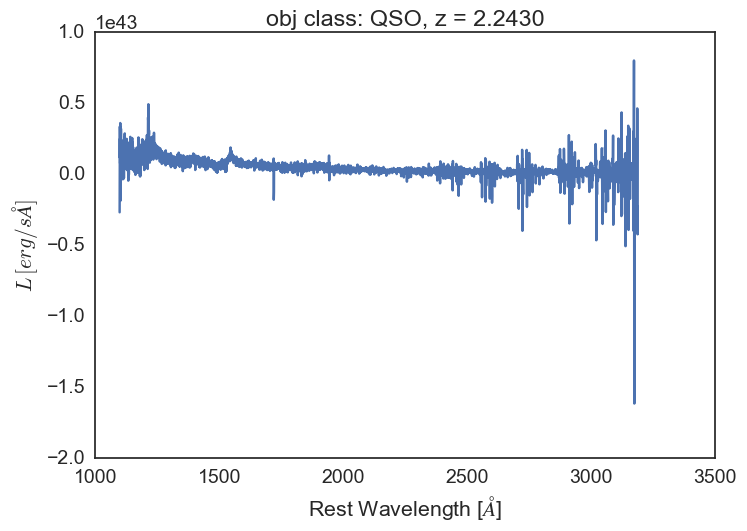

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_47_S24_0973_0727-spec-3834-56014-0734.txt
Object: Blind15A_47_S24_0973_0727
Blind15A_47_S24_0973_07
raMedian      160.905
decMedian    0.584034
Name: Blind15A_47_S24_0973_0727, dtype: object


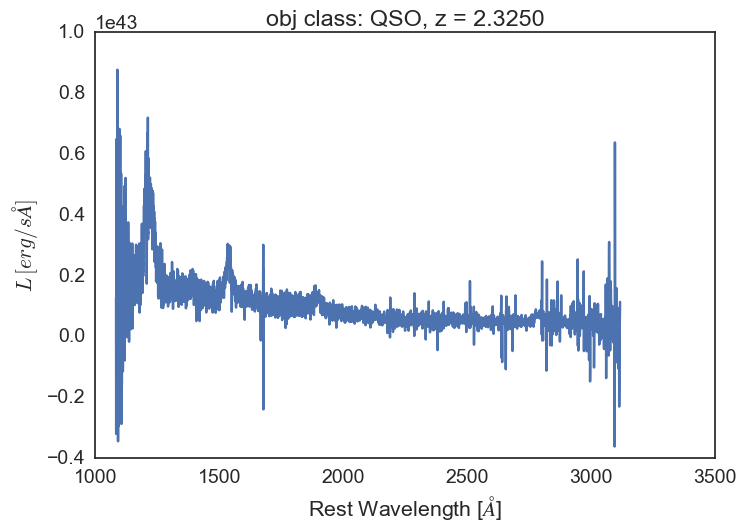

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_47_S8_0208_1641-spec-0274-51913-0388.txt
Object: Blind15A_47_S8_0208_1641
Blind15A_47_S8_0208_16
raMedian      159.574
decMedian    0.312366
Name: Blind15A_47_S8_0208_1641, dtype: object


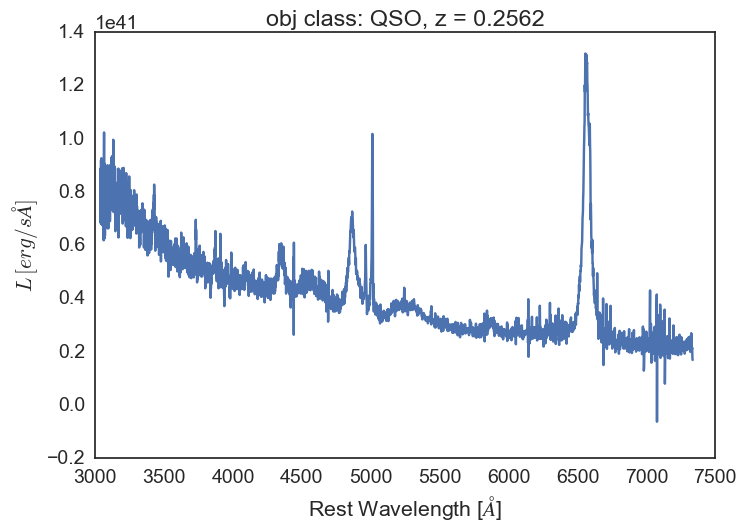

/Users/jorgetil/Astro/HITS/BH/spec/sdss/Blind15A_48_S10_1833_1318-spec-3785-55273-0972.txt
Object: Blind15A_48_S10_1833_1318
Blind15A_48_S10_1833_13
raMedian     158.958
decMedian   -1.90287
Name: Blind15A_48_S10_1833_1318, dtype: object


In [116]:
for i, spec in enumerate(sdss_list):
    print spec
    year, field, ccd, xpix, ypix = re.findall(r'(\w+?)\_(\d\d?)\_(\w\d+?)\_(.*?)\_(.*?)-', spec)[0]
    obj = '%s_%s_%s_%s_%s' % (year, field, ccd, xpix, ypix)
    print 'Object:', obj
    print obj[:-2]
    if obj[-2:] == '_2': continue
    
    print table.loc[obj,['raMedian','decMedian']]
    if sample == 'TS':
        data = np.loadtxt(spec)
        lam, flux, err = data[:,0], data[:,1], data[:,2]
        Z = table.loc[obj,'Z']
        obj_class = 'QSO'
    elif sample == 'candidates':
        hdulist = fits.open(spec)
        data = hdulist[0].data
        print hdulist.info()
        print hdulist[0].header
        obj_class = hdulist[0].header['CLASS']
        Z = hdulist[0].header['Z']
        lam, flux = data[2], data[0]

    plt.plot(lam, flux)
    plt.title('obj class: %s, z = %.4f' % (obj_class, Z))
    plt.xlabel(r'Rest Wavelength $[\AA]$')
    plt.ylabel(r'$L \, [erg/s\AA]$')
    plt.show()
    
    #break